In [142]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from arch.unitroot import PhillipsPerron

In [3]:
root = "E:/deep-learning-wellington-od-develop/deep-learning-wellington-od-develop/data/"

In [4]:
credit = pd.read_csv(root+"data4columbia_credit.csv")

In [5]:
sales = pd.read_csv(root+"data4columbia_sales.csv")

In [9]:
credit['trans_date'] = pd.to_datetime(credit['trans_date'])

In [210]:
credit

Unnamed: 0 trans_date           data
0       ef1bcca724f3 2016-01-01  266648.924500
1       ef1bcca724f3 2016-01-02  330109.961300
2       ef1bcca724f3 2016-01-03  248299.827200
3       ef1bcca724f3 2016-01-04  146428.339600
4       ef1bcca724f3 2016-01-05  146854.815500
...              ...        ...            ...
116654  e2415cb7f63d 2022-11-05    1149.371612
116655  e2415cb7f63d 2022-11-06     890.458833
116656  e2415cb7f63d 2022-11-07    1233.454763
116657  e2415cb7f63d 2022-11-08    2478.464933
116658  e2415cb7f63d 2022-11-09    2027.376001

[116659 rows x 3 columns]

In [203]:
credit['Unnamed: 0'].nunique()

48

In [13]:
company_list = credit["Unnamed: 0"].unique()[:4]

In [14]:
company_list

array(['ef1bcca724f3', '22328d65a8ae', 'e4cf8ab67d58', 'dfe2fbf1ed01'],
      dtype=object)

In [26]:
company0 = credit[credit["Unnamed: 0"] == company_list[0]]

In [208]:
plt.rcParams['figure.figsize'] = (20, 7)

In [27]:
company0.set_index('trans_date',inplace=True)


In [18]:
company0

Unnamed: 0         data
trans_date                           
2016-01-01  ef1bcca724f3  266648.9245
2016-01-02  ef1bcca724f3  330109.9613
2016-01-03  ef1bcca724f3  248299.8272
2016-01-04  ef1bcca724f3  146428.3396
2016-01-05  ef1bcca724f3  146854.8155
...                  ...          ...
2022-11-05  ef1bcca724f3  460278.6564
2022-11-06  ef1bcca724f3  608335.2922
2022-11-07  ef1bcca724f3  295437.1084
2022-11-08  ef1bcca724f3  259950.3846
2022-11-09  ef1bcca724f3  266355.1120

[2505 rows x 2 columns]

C:\Users\GuangruiXUE\AppData\Local\Temp\ipykernel_51956\1761633415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company0.dropna(inplace=True)


Text(0.5, 1.0, 'Company0')

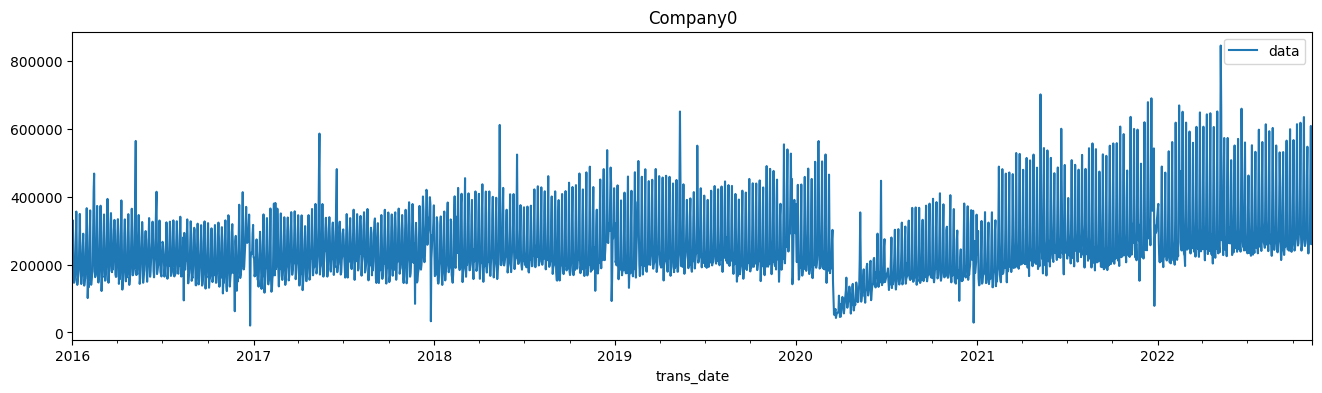

In [202]:
company0.dropna(inplace=True)
company0.plot()
plt.title("Company0")

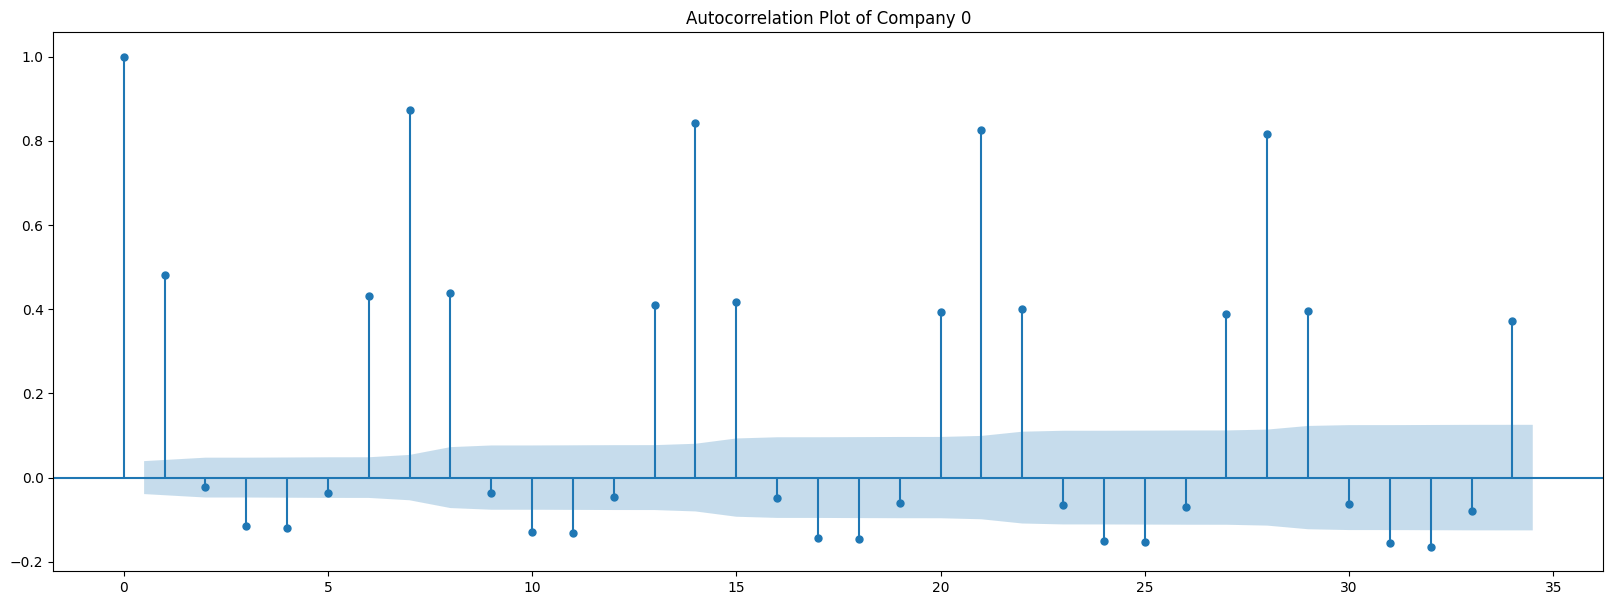

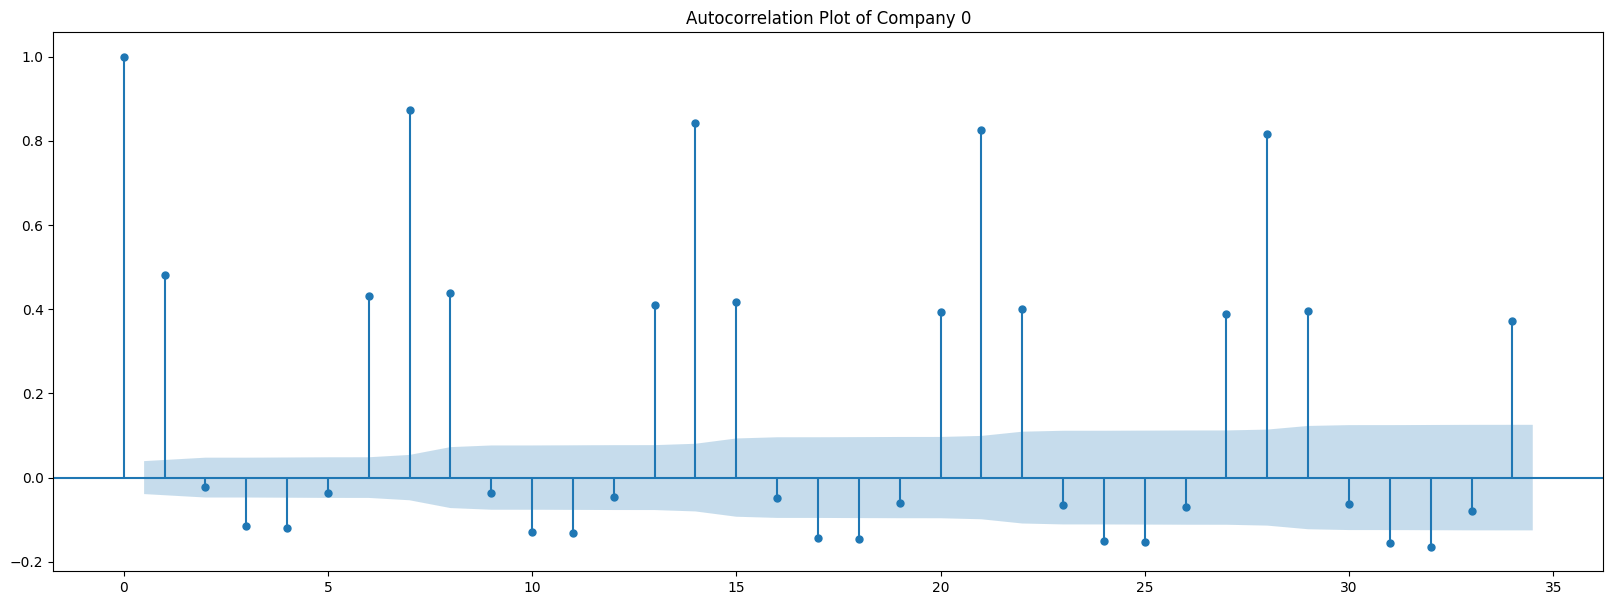

In [213]:
sm.graphics.tsa.plot_acf(company0['data'], title="Autocorrelation Plot of Company 0")

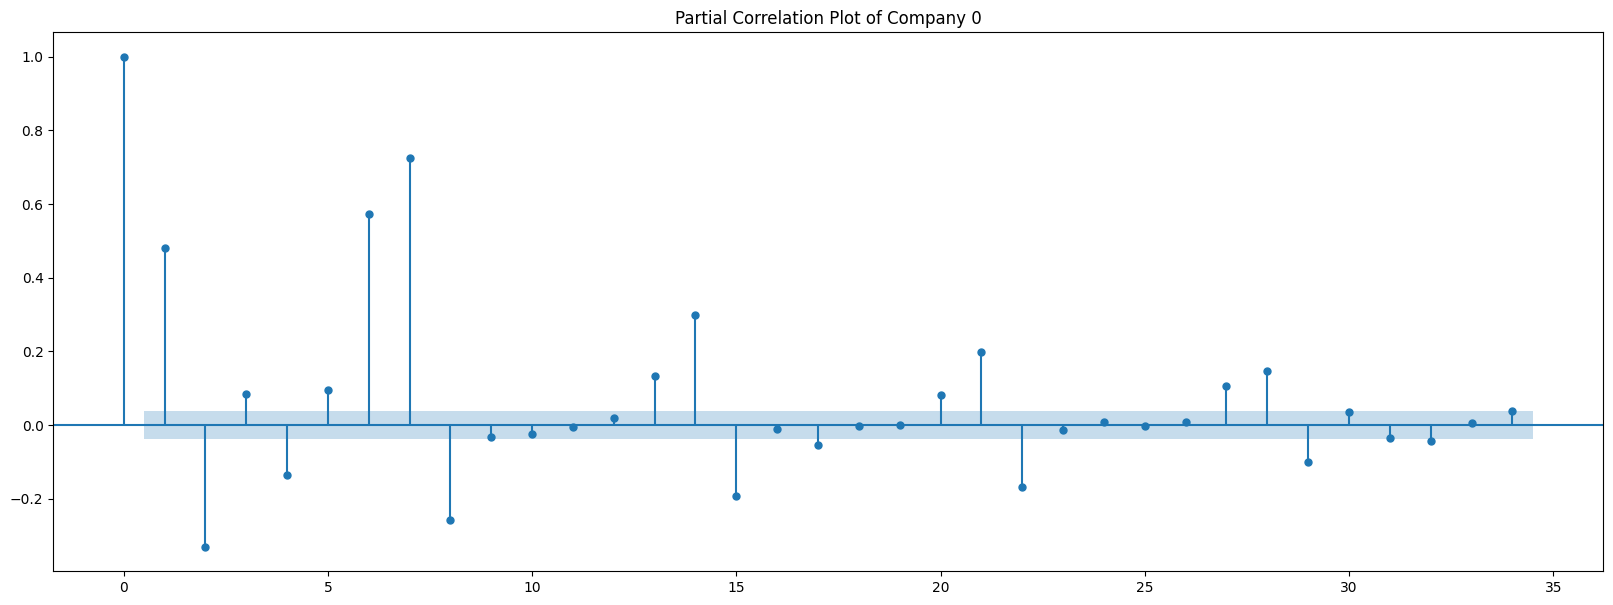

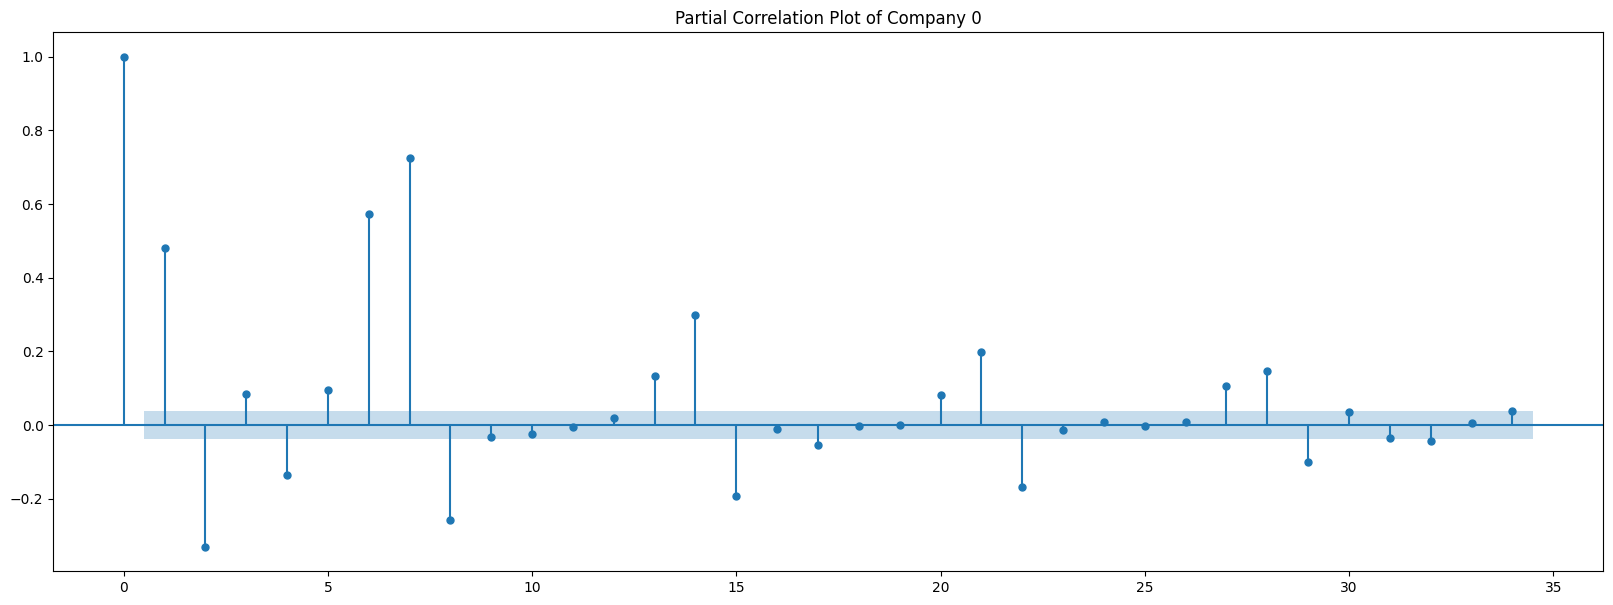

In [217]:
sm.graphics.tsa.plot_pacf(company0['data'], title = "Partial Correlation Plot of Company 0")

In [251]:
result01 = seasonal_decompose(company0['data'], period=7)

<AxesSubplot:xlabel='trans_date'>

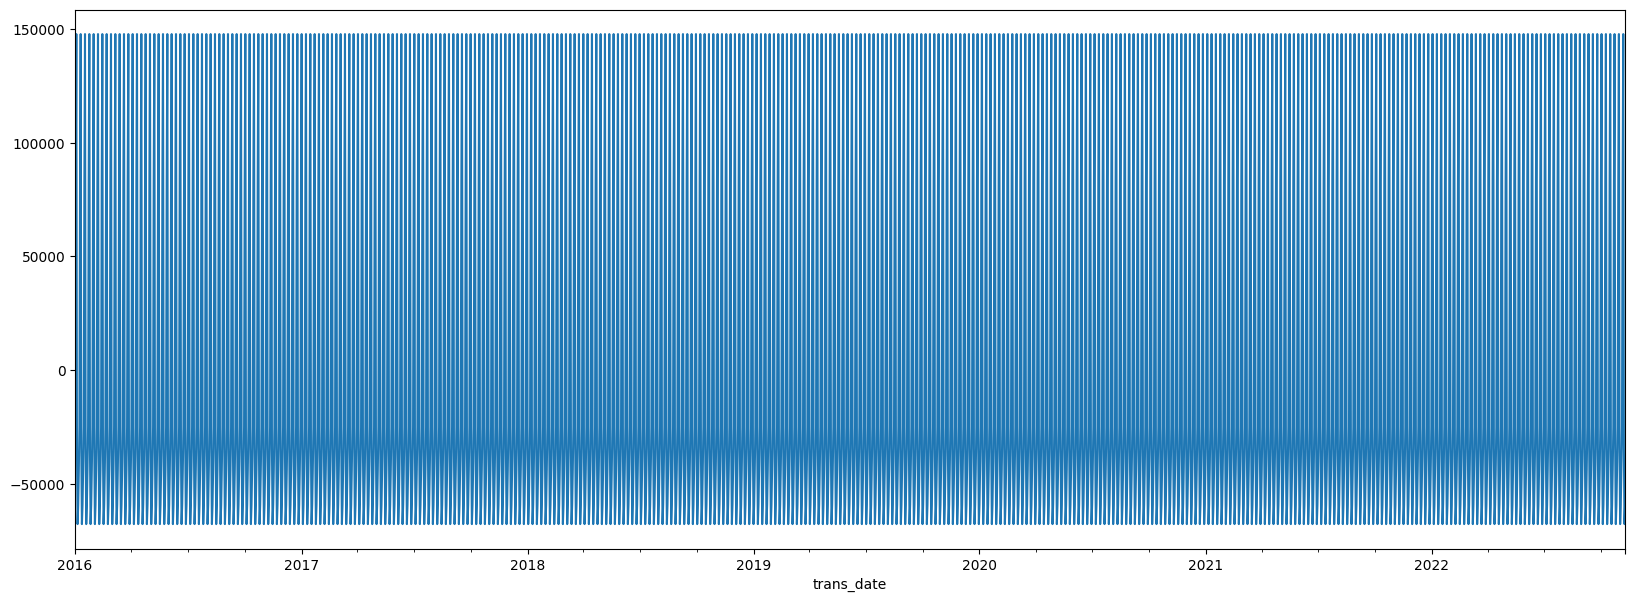

In [252]:
result01.seasonal.plot()



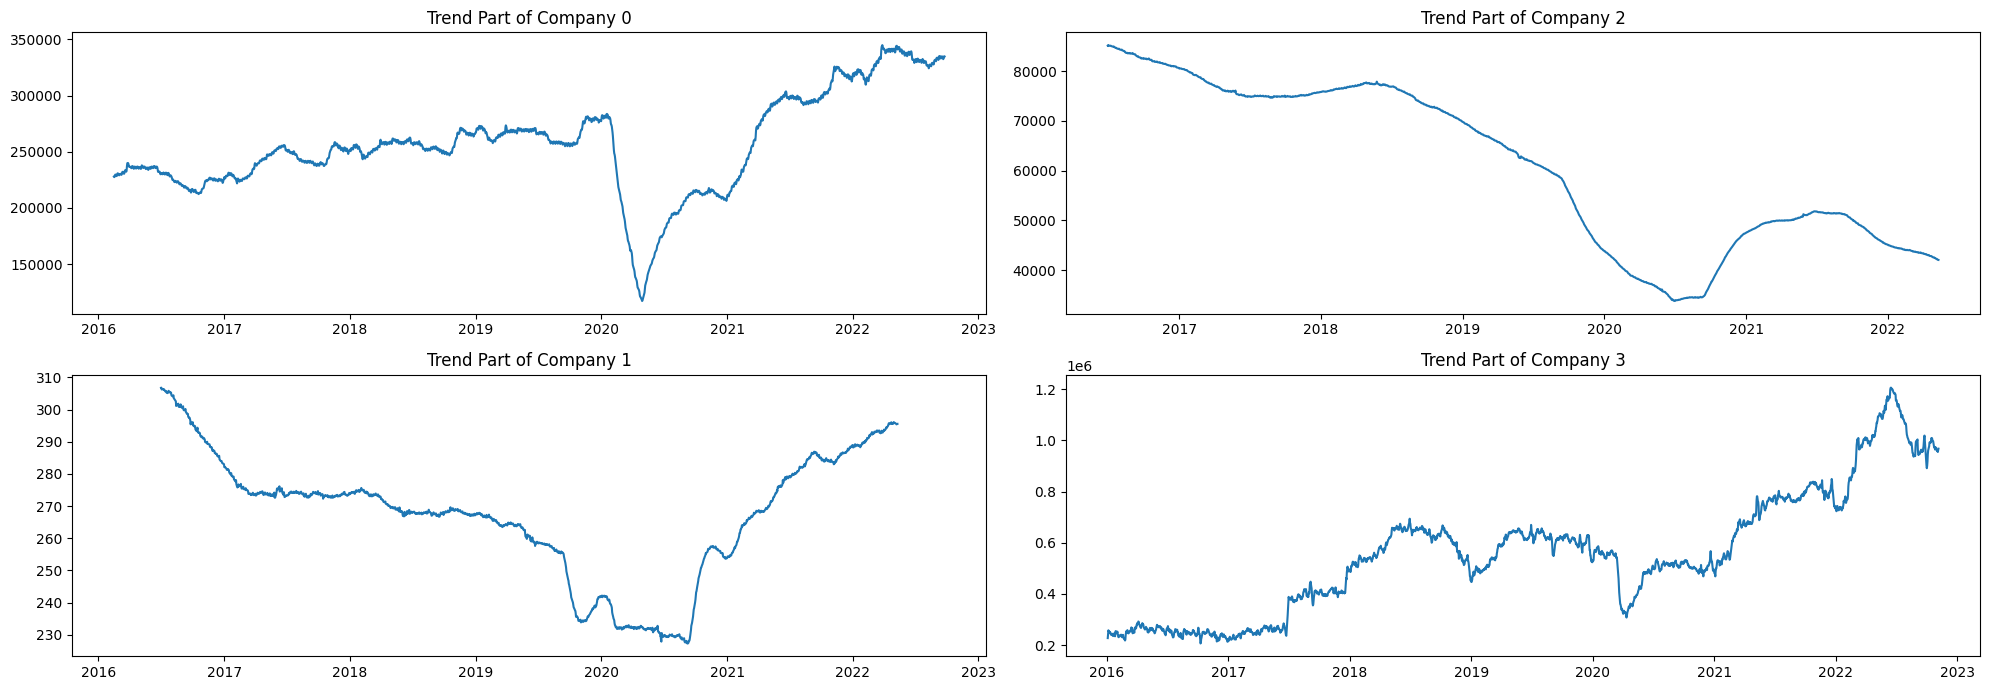

In [266]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(result02.trend)
axs[0, 0].set_title("Trend Part of Company 0")
axs[1, 0].plot(result12.trend)
axs[1, 0].set_title("Trend Part of Company 1")
axs[1, 0].sharex(axs[0, 0])
axs[0, 1].plot(result22.trend)
axs[0, 1].set_title("Trend Part of Company 2")
axs[1, 1].plot(result31.trend)
axs[1, 1].set_title("Trend Part of Company 3")
fig.tight_layout()

<AxesSubplot:xlabel='trans_date'>

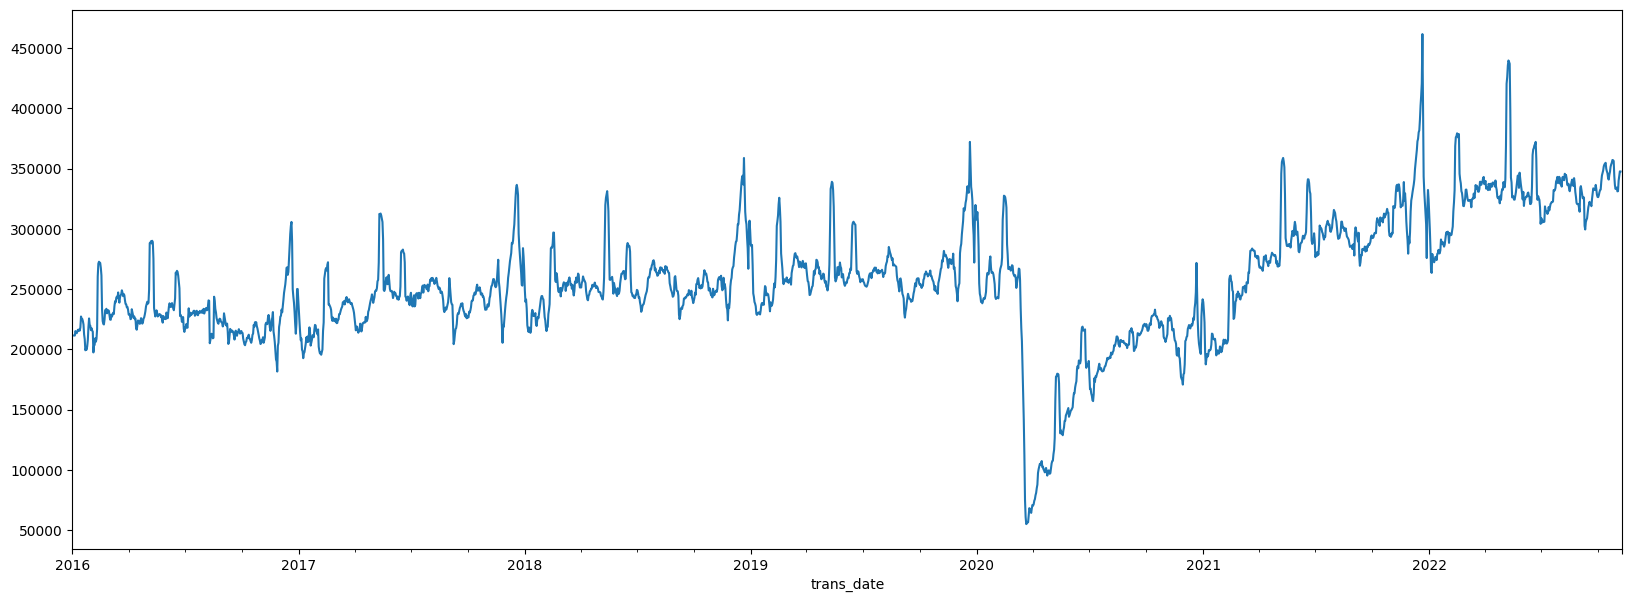

In [254]:
result01.trend.plot()

<AxesSubplot:xlabel='trans_date'>

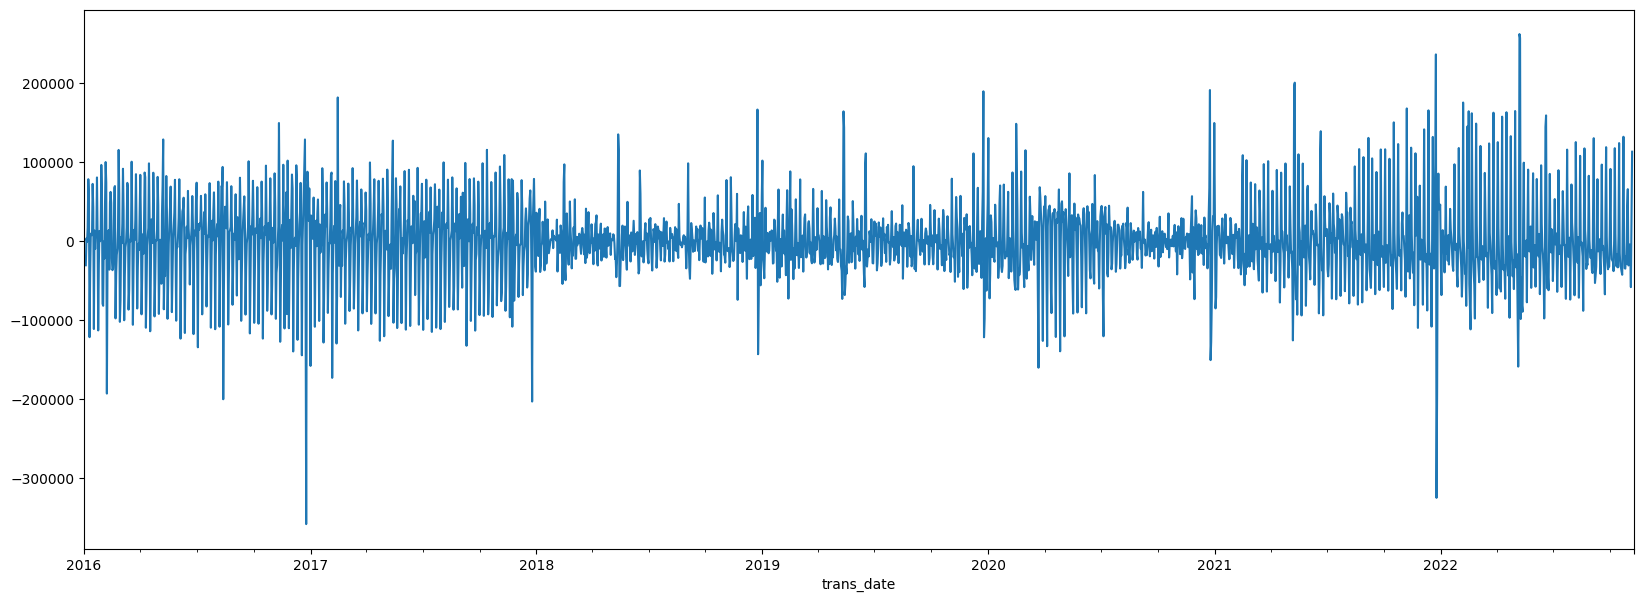

In [245]:
result01.resid.plot()

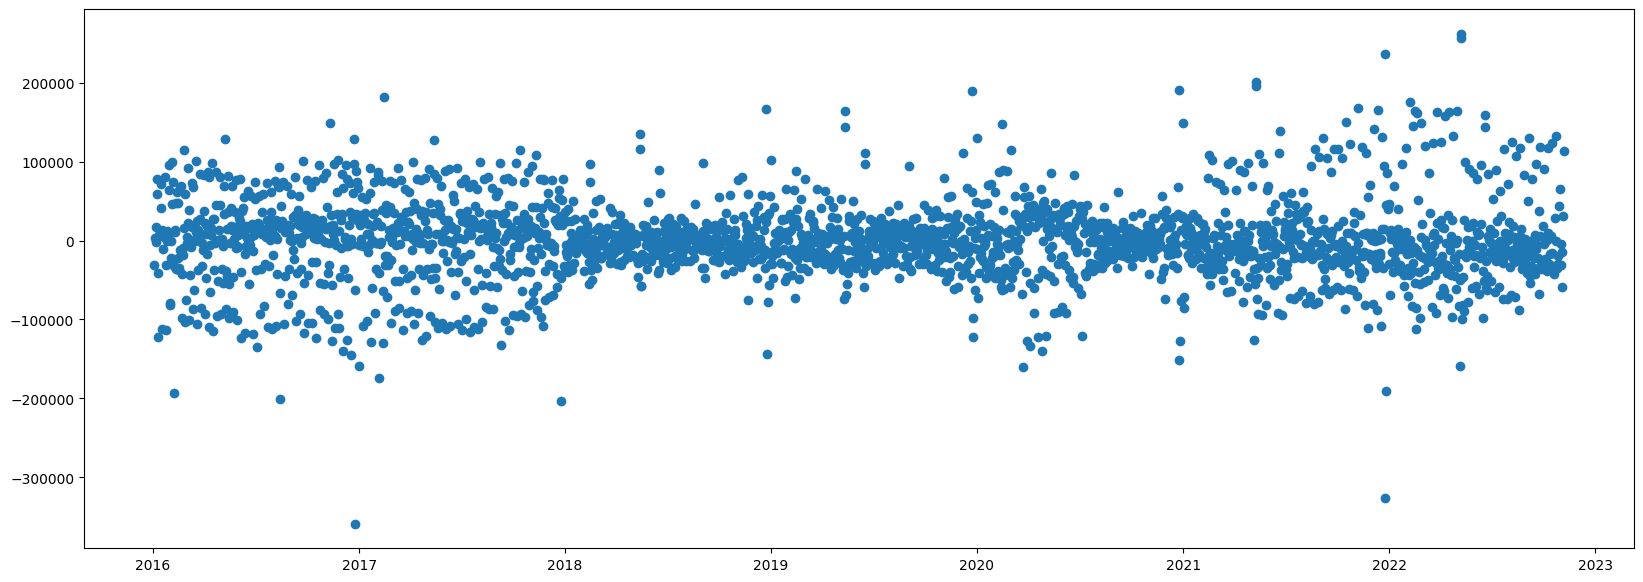

In [246]:
result01_resid = result01.resid.reset_index()
plt.scatter(result01_resid['trans_date'], result01_resid['resid'])

In [257]:
result02 = seasonal_decompose(company0['data'], period=90)

<AxesSubplot:xlabel='trans_date'>

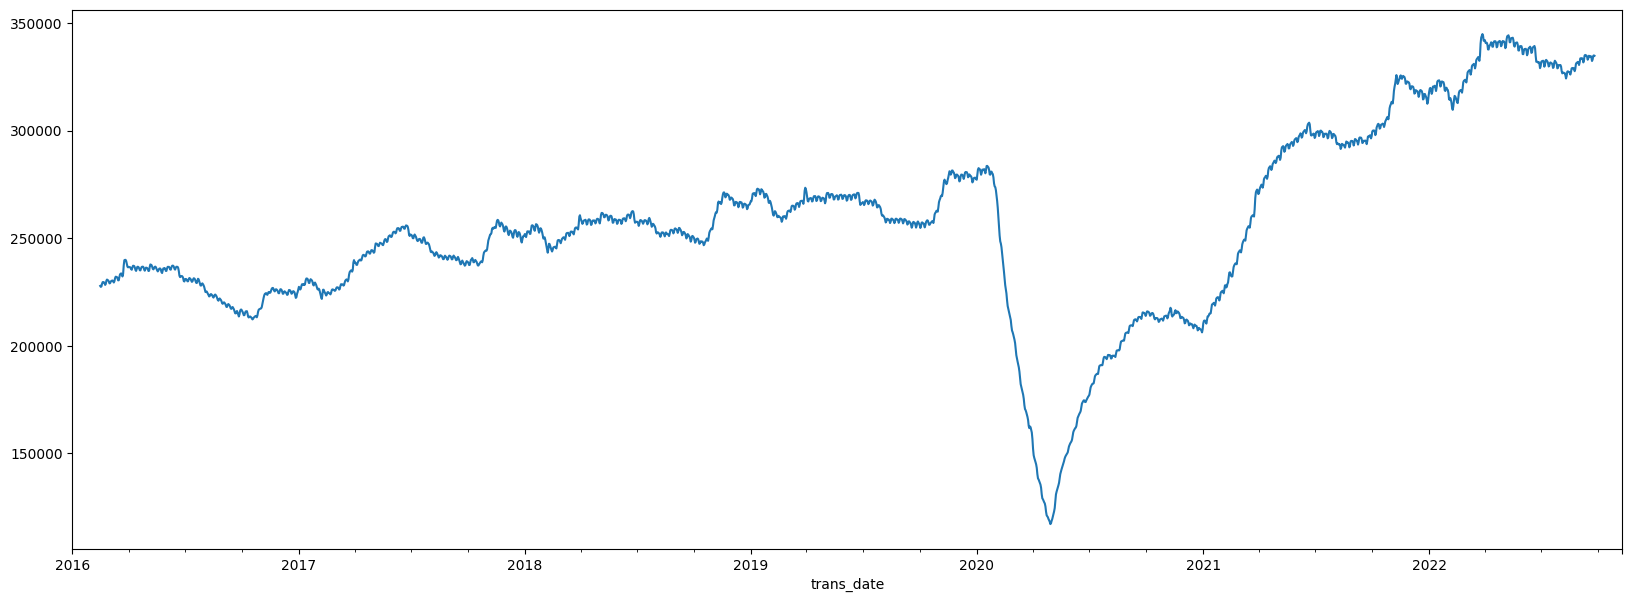

In [258]:
result02.trend.plot()

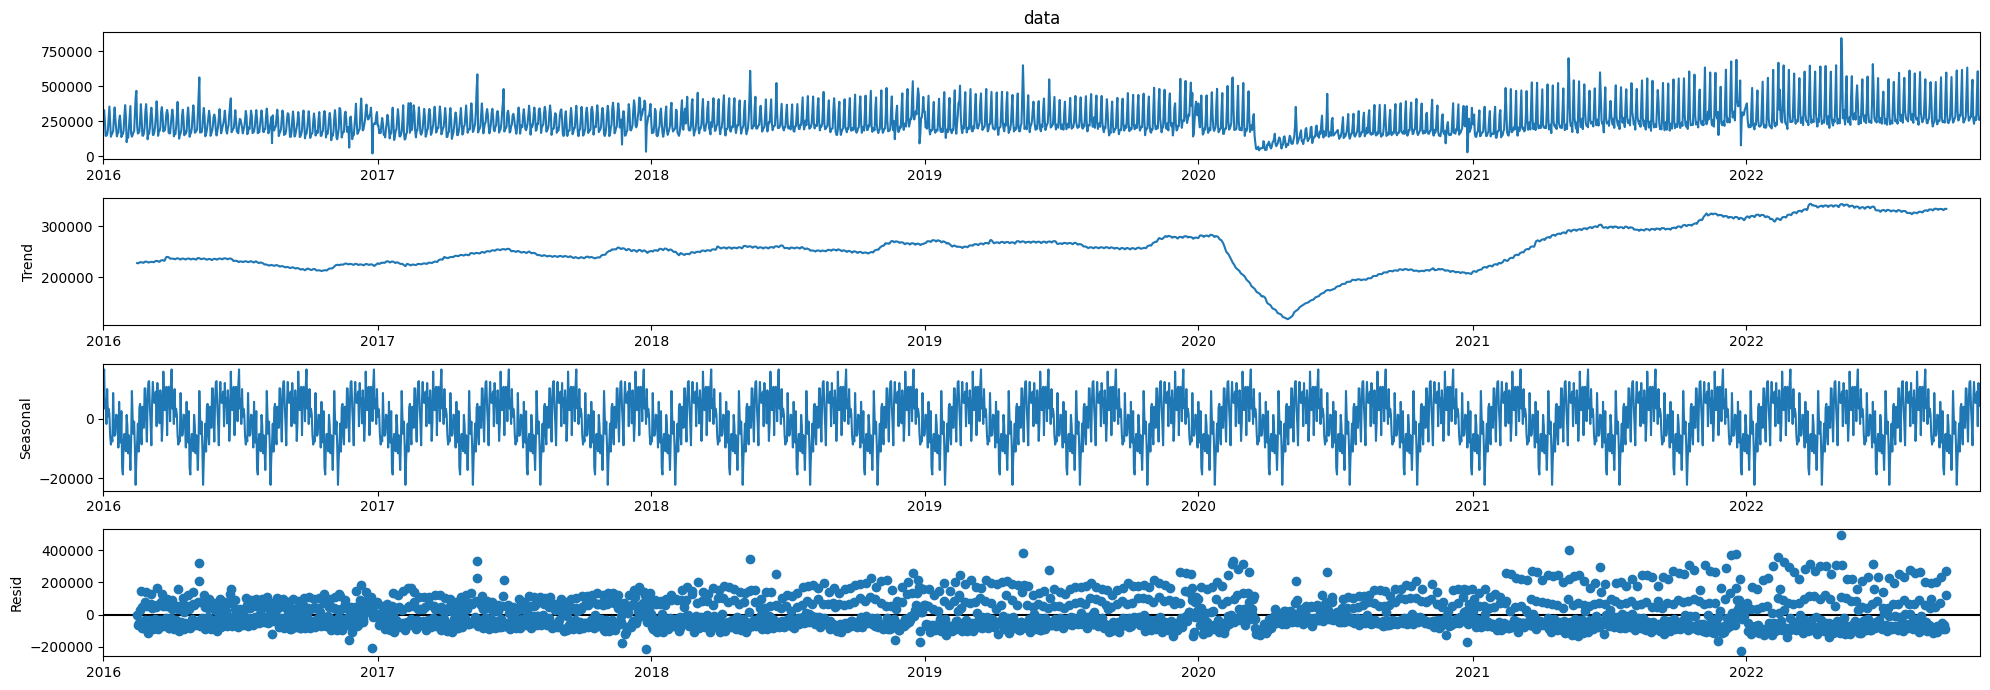

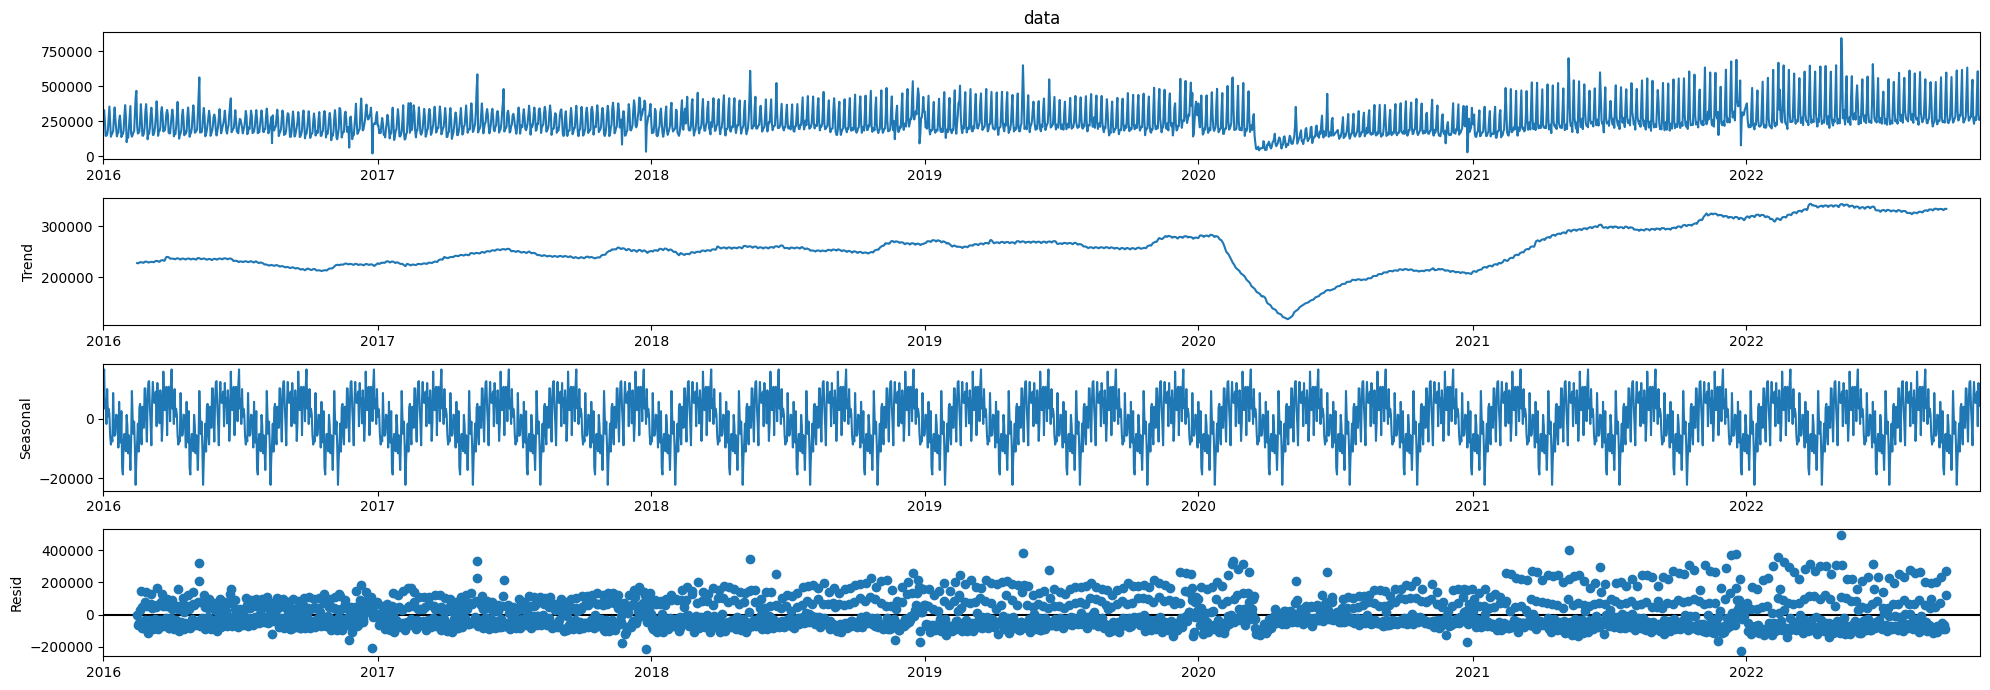

In [259]:
result02.plot()

In [139]:
company0_d1 = company0['data'].diff().dropna()

In [140]:
company0_d7 = company0['data'].diff(7).dropna()

In [144]:
pp0 = PhillipsPerron(company0['data'])
print(pp0.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -36.513
P-value                         0.000
Lags                               27
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [141]:
pp01 = PhillipsPerron(company0_d1)
print(pp01.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic               -227.914
P-value                         0.000
Lags                               27
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [143]:
pp07 = PhillipsPerron(company0_d7)
print(pp07.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -32.470
P-value                         0.000
Lags                               27
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


d:\Python3.9\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='data'>

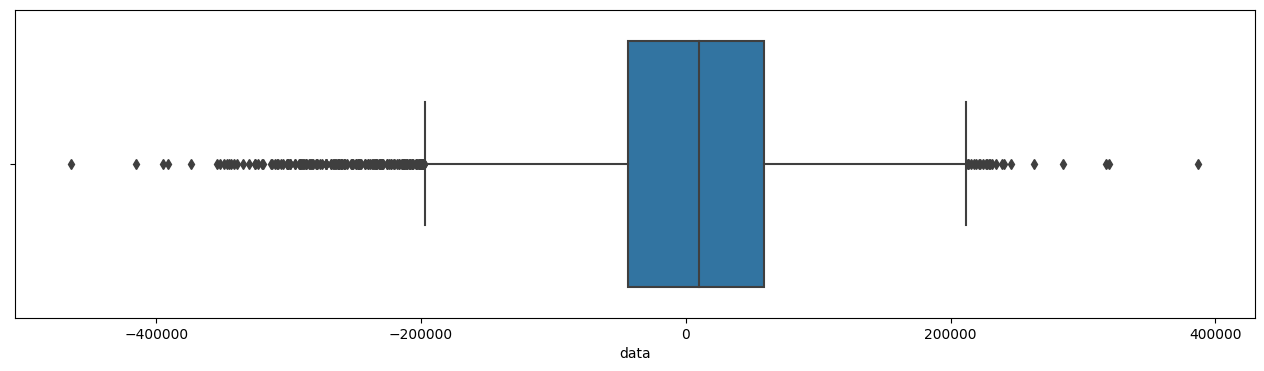

In [145]:
sns.boxplot(company0_d1)

(array([  1.,   0.,   0.,   0.,   1.,   1.,   1.,   1.,   0.,   6.,   3.,
          6.,   5.,  11.,  14.,  10.,  17.,  15.,  12.,  12.,  18.,  26.,
         25.,  24.,  16.,  23.,  25.,  33.,  21.,  27.,  35.,  36.,  69.,
         73.,  89.,  85., 100., 168., 259., 252., 172., 125.,  61.,  76.,
         68.,  76.,  63.,  60.,  43.,  51.,  45.,  34.,  30.,  28.,  22.,
         11.,   7.,   6.,   1.,   1.,   0.,   1.,   0.,   0.,   2.,   0.,
          0.,   0.,   0.,   1.]),
 array([-464095.11076   , -451933.46194771, -439771.81313543,
        -427610.16432314, -415448.51551086, -403286.86669857,
        -391125.21788629, -378963.569074  , -366801.92026171,
        -354640.27144943, -342478.62263714, -330316.97382486,
        -318155.32501257, -305993.67620029, -293832.027388  ,
        -281670.37857571, -269508.72976343, -257347.08095114,
        -245185.43213886, -233023.78332657, -220862.13451429,
        -208700.485702  , -196538.83688971, -184377.18807743,
        -172215.53926514, 

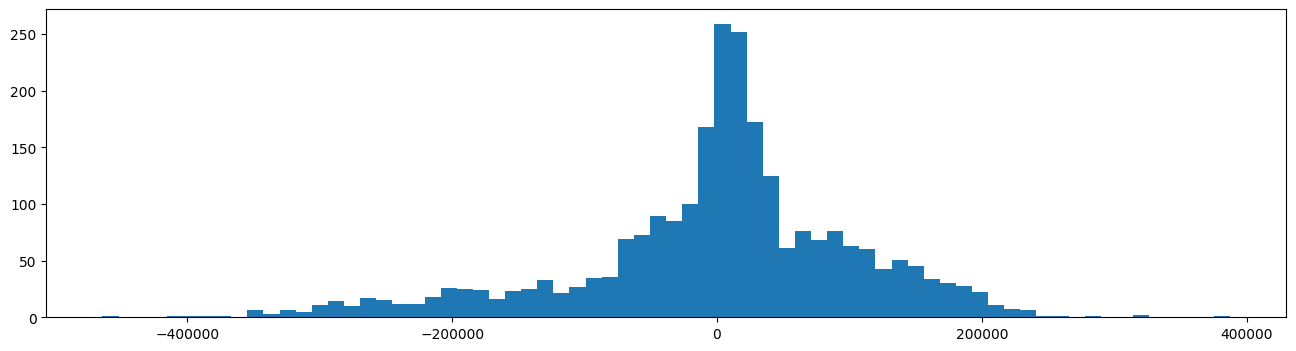

In [146]:
plt.hist(company0_d1, bins= 70)

The lower bound value is: -319061.88470256794
The upper bound value is: 319061.65002804715


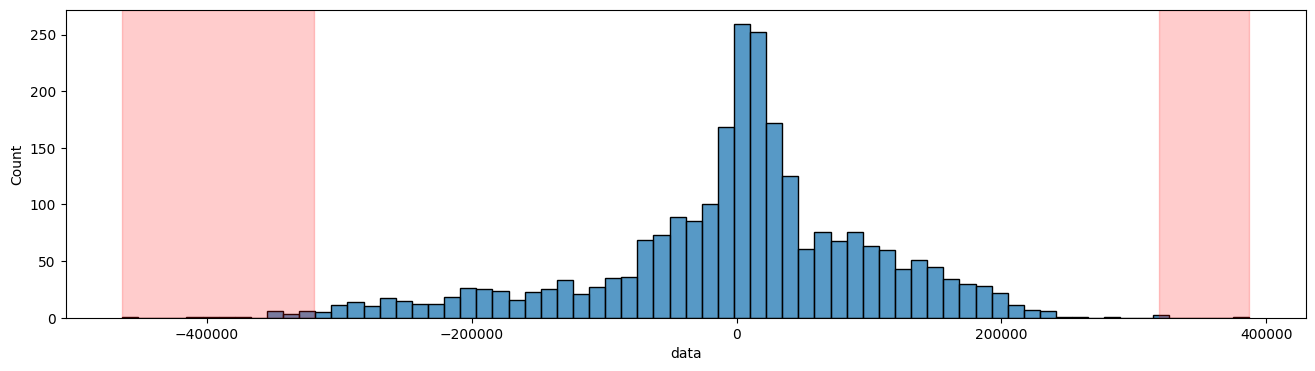

In [147]:
data_mean, data_std = company0_d1.mean(), company0_d1.std()
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

print('The lower bound value is:', data_mean - cut_off)
print('The upper bound value is:', data_mean + cut_off)

sns.histplot(company0_d1, bins=70)
plt.axvspan(xmin = lower,xmax= company0_d1.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= company0_d1.max(),alpha=0.2, color='red')

In [69]:
company1 = credit[credit["Unnamed: 0"] == company_list[1]]
company1.set_index('trans_date',inplace=True)

C:\Users\GuangruiXUE\AppData\Local\Temp\ipykernel_51956\4218554254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company1.dropna(inplace=True)


<AxesSubplot:xlabel='trans_date'>

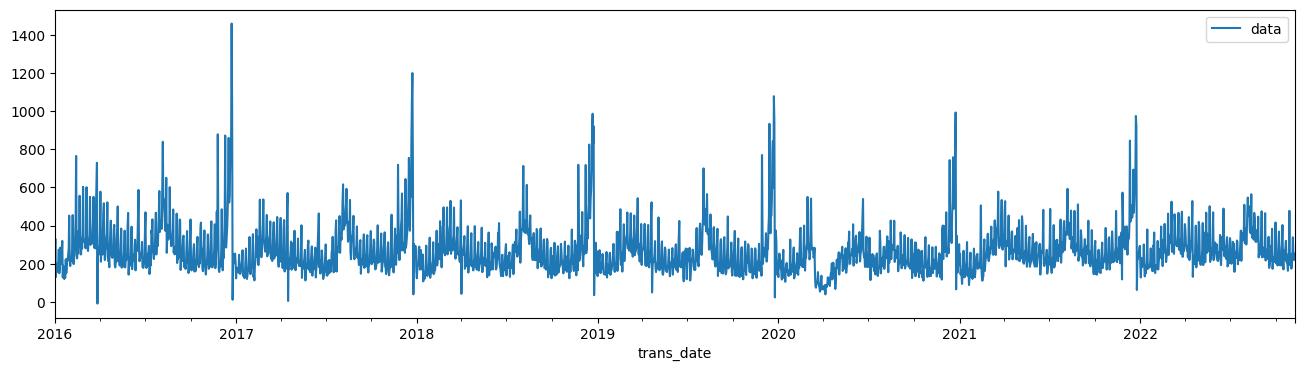

In [105]:
company1.dropna(inplace=True)
company1.plot()

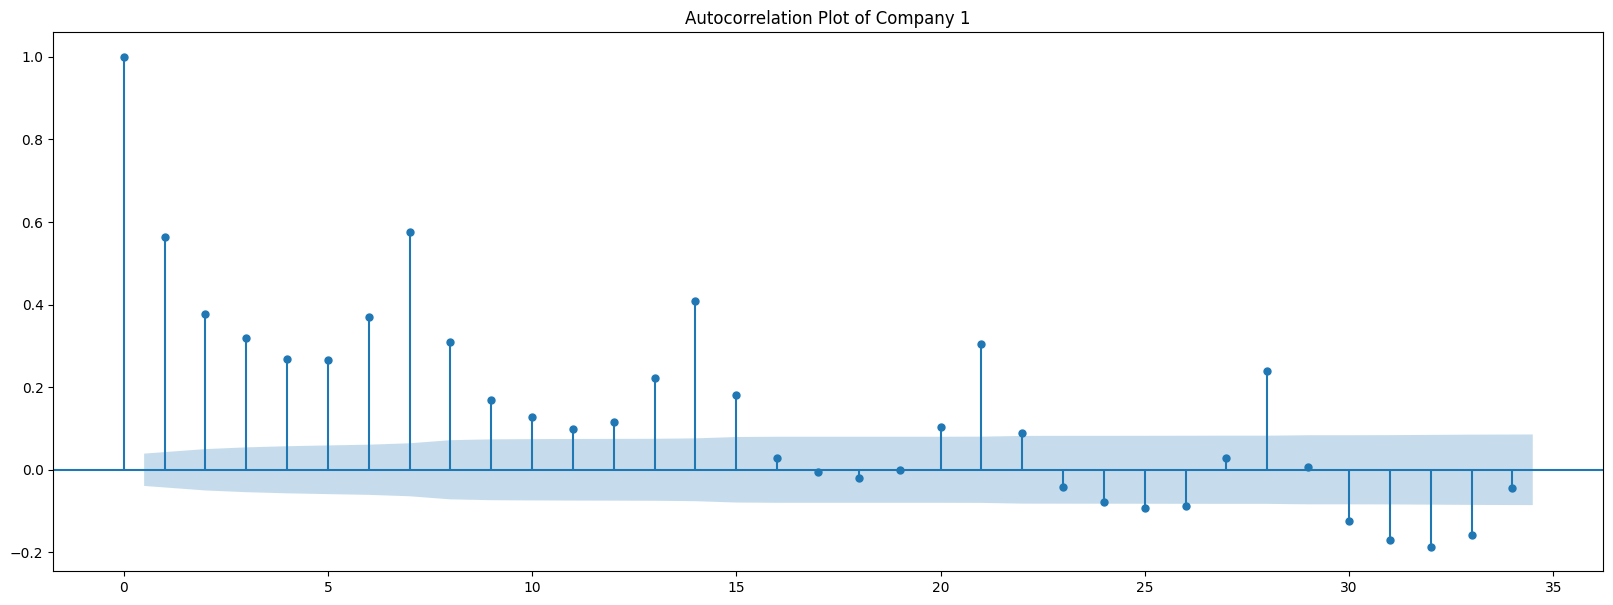

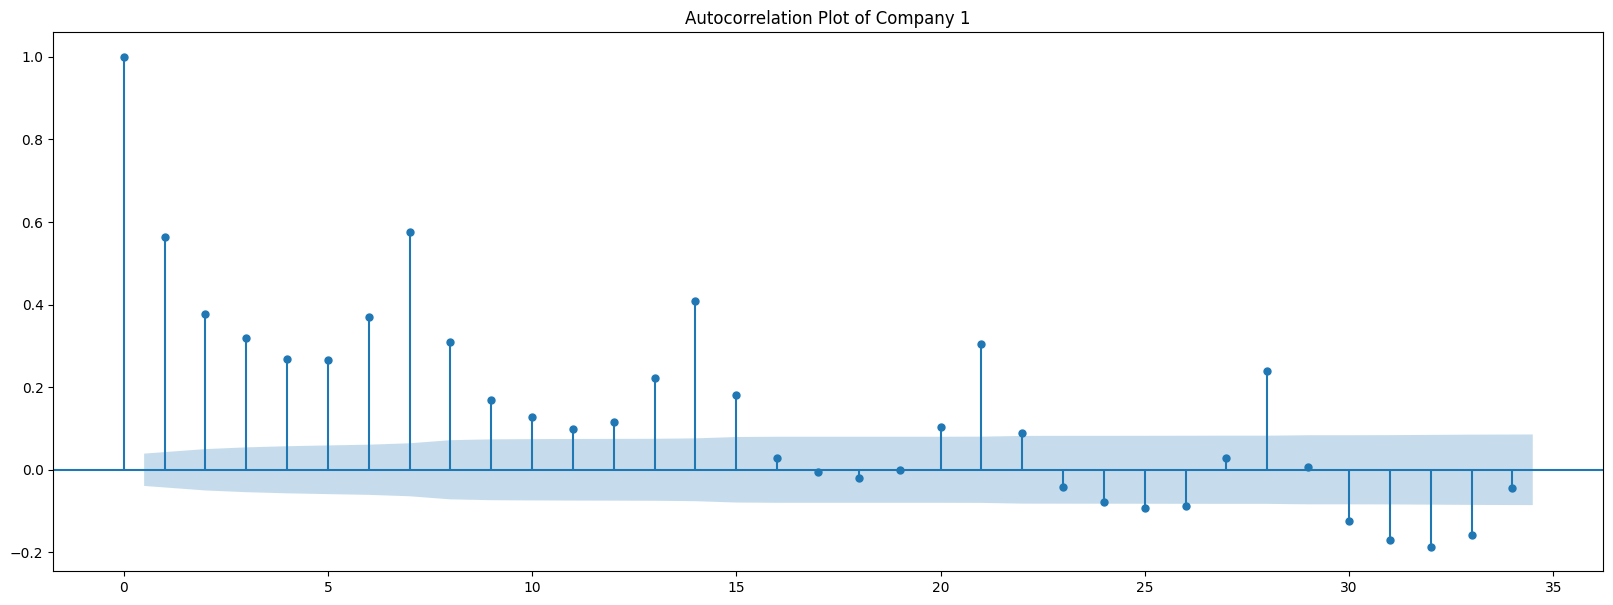

In [214]:
sm.graphics.tsa.plot_acf(company1['data'], title= "Autocorrelation Plot of Company 1")

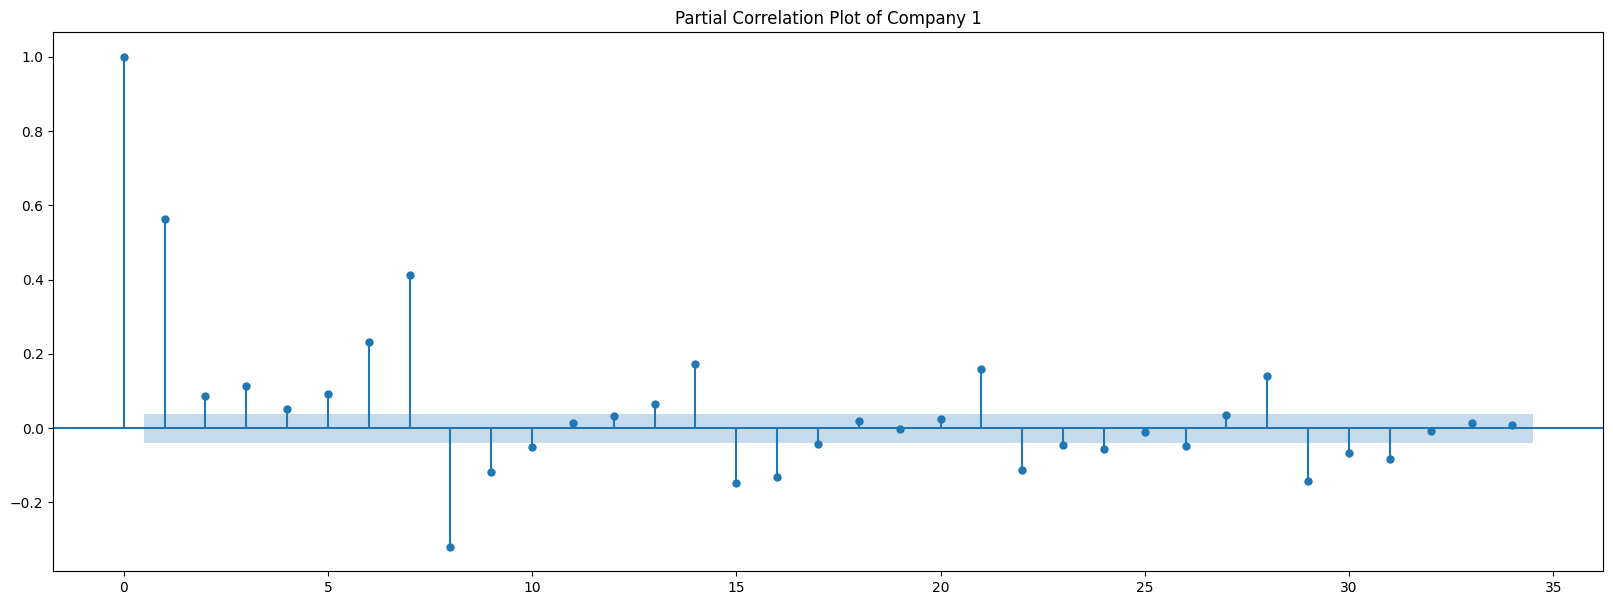

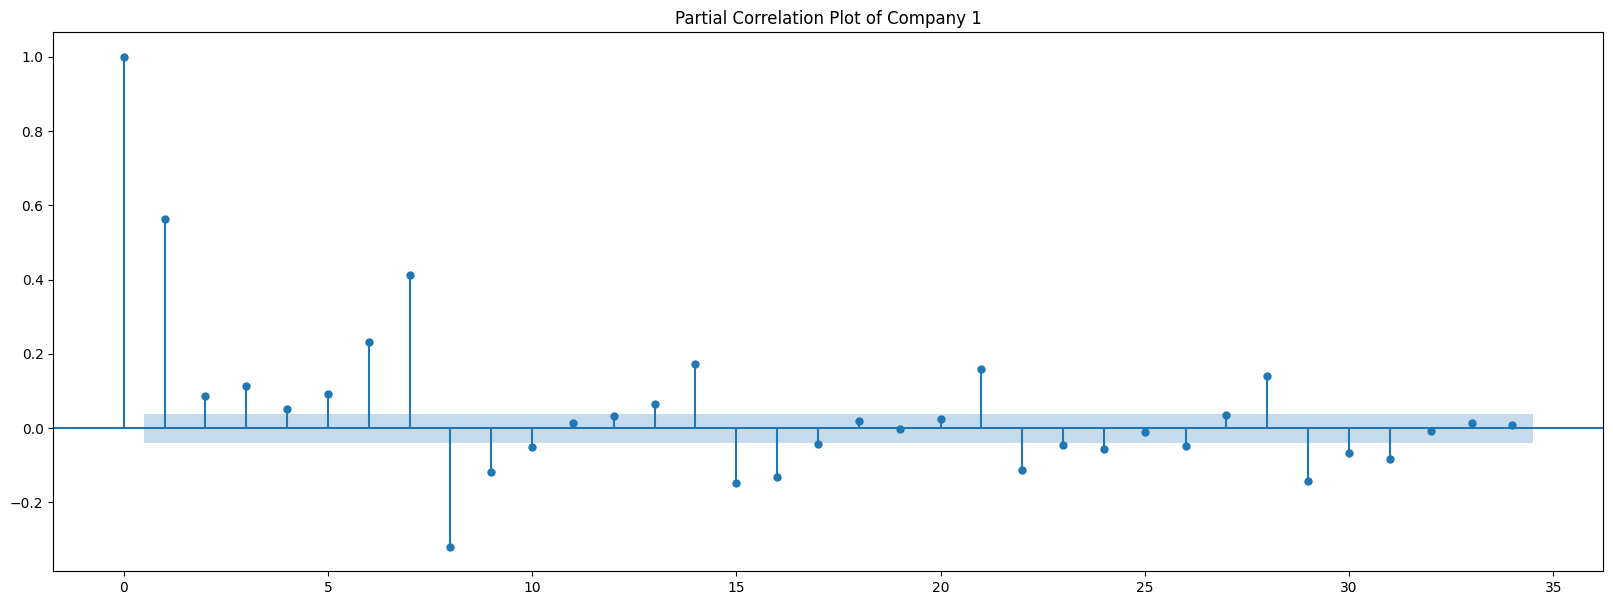

In [218]:
sm.graphics.tsa.plot_pacf(company1['data'], title = "Partial Correlation Plot of Company 1")

In [122]:
result11 = seasonal_decompose(company1['data'], period=7)

<AxesSubplot:xlabel='trans_date'>

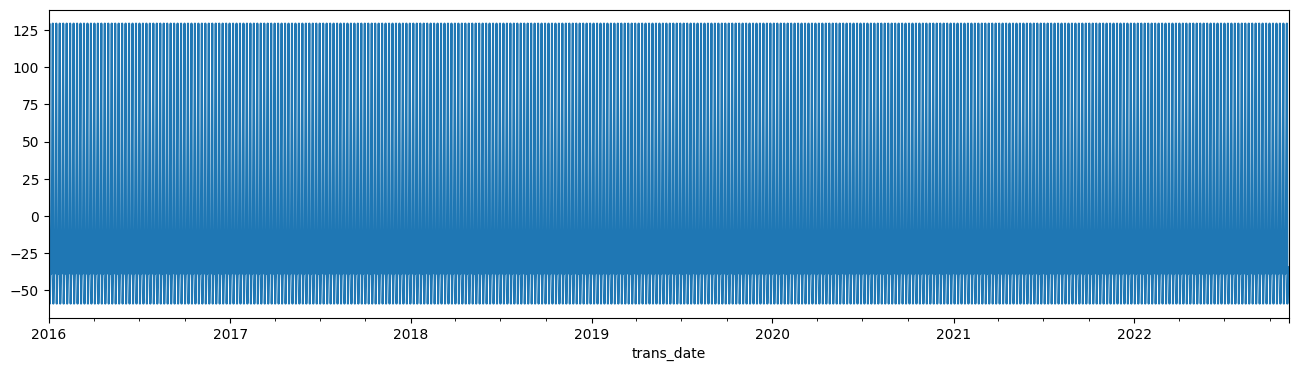

In [123]:
result11.seasonal.plot()

<AxesSubplot:xlabel='trans_date'>

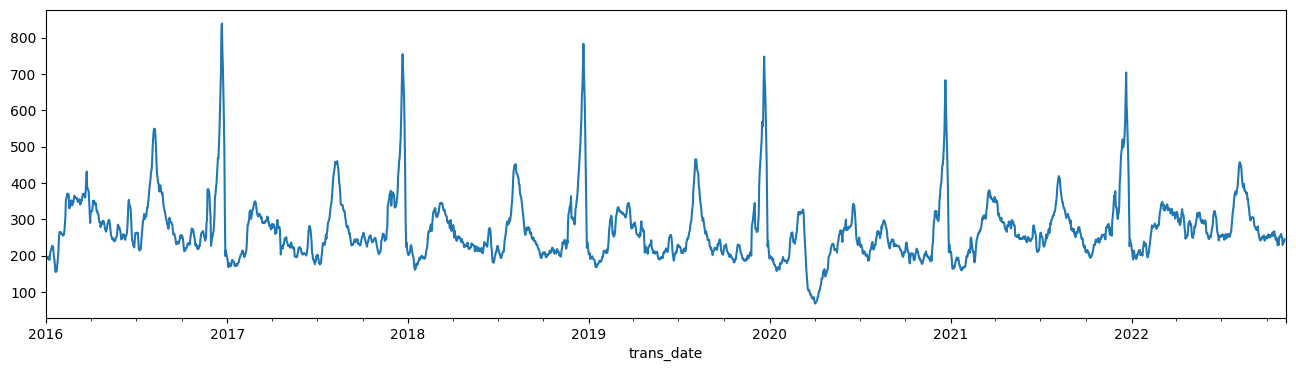

In [124]:
result11.trend.plot()

<AxesSubplot:xlabel='trans_date'>

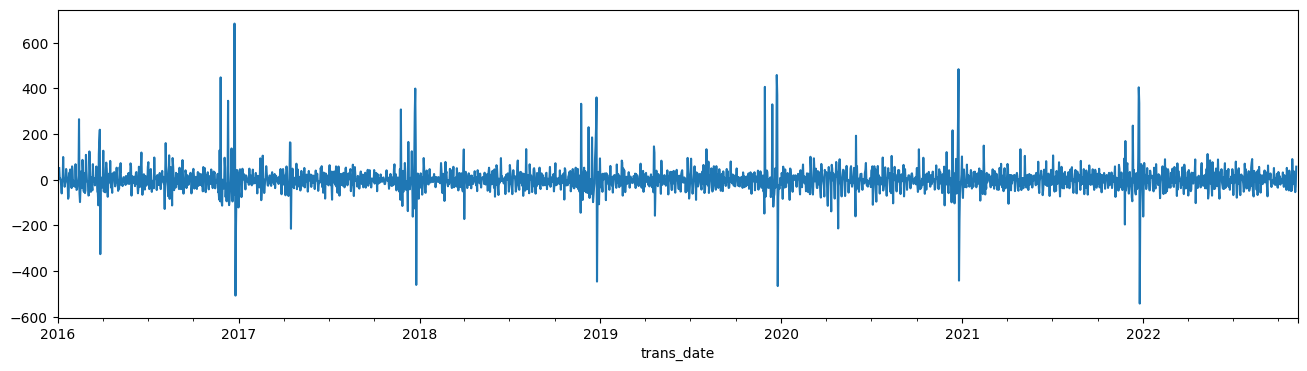

In [125]:
result11.resid.plot()

In [263]:
result12 = seasonal_decompose(company1['data'], period=365)

<AxesSubplot:xlabel='trans_date'>

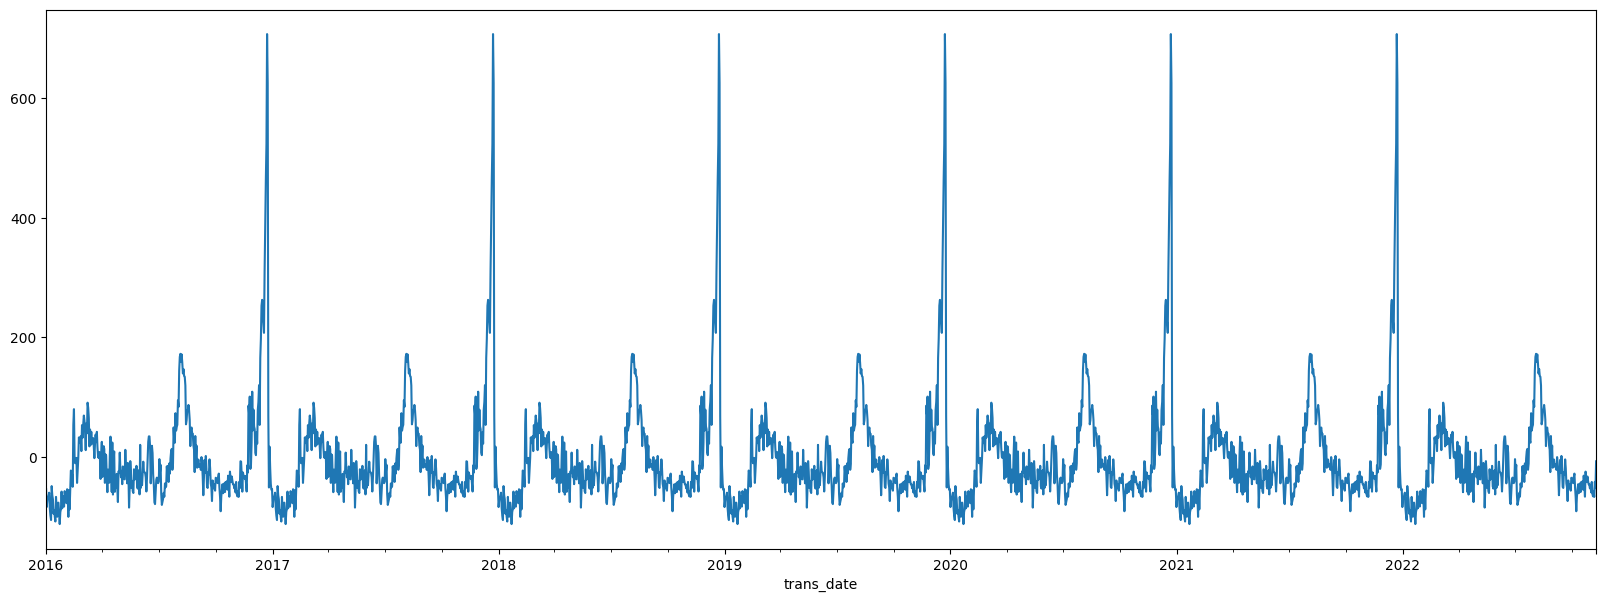

In [264]:
result12.seasonal.plot()

<AxesSubplot:xlabel='trans_date'>

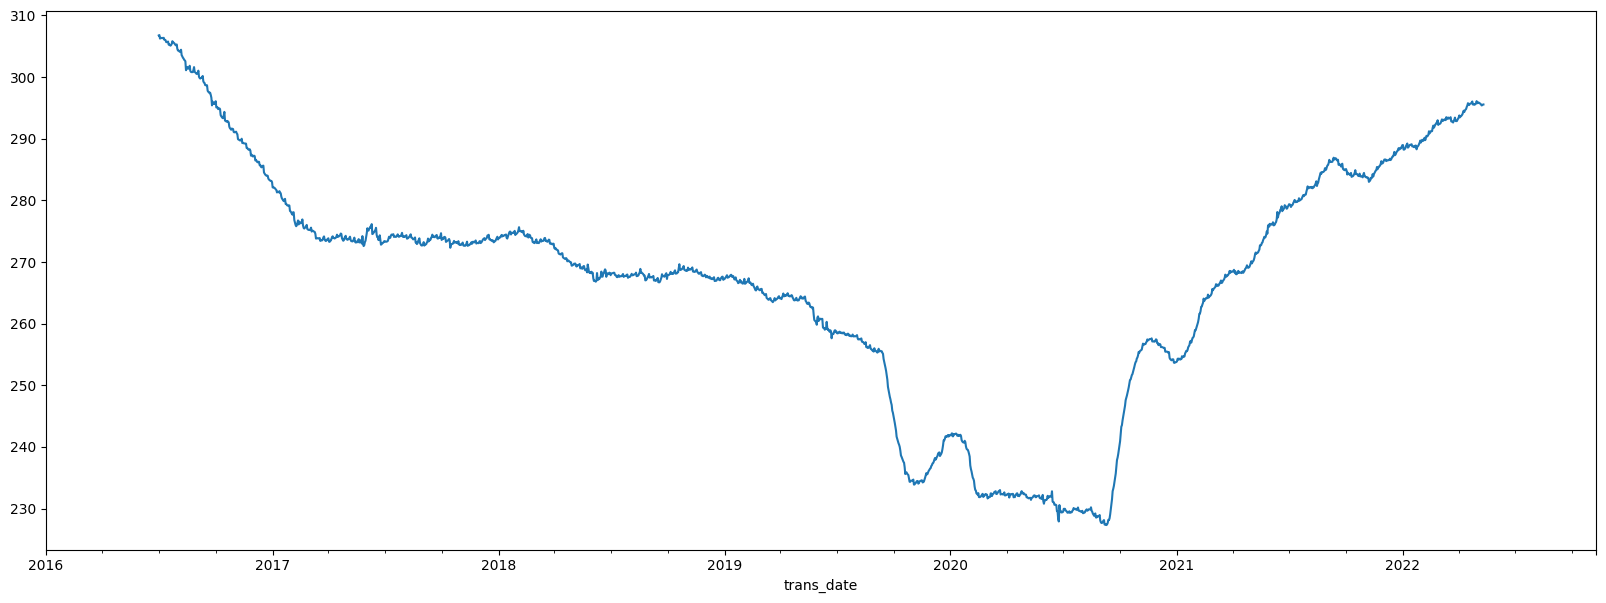

In [265]:
result12.trend.plot()

<AxesSubplot:xlabel='trans_date'>

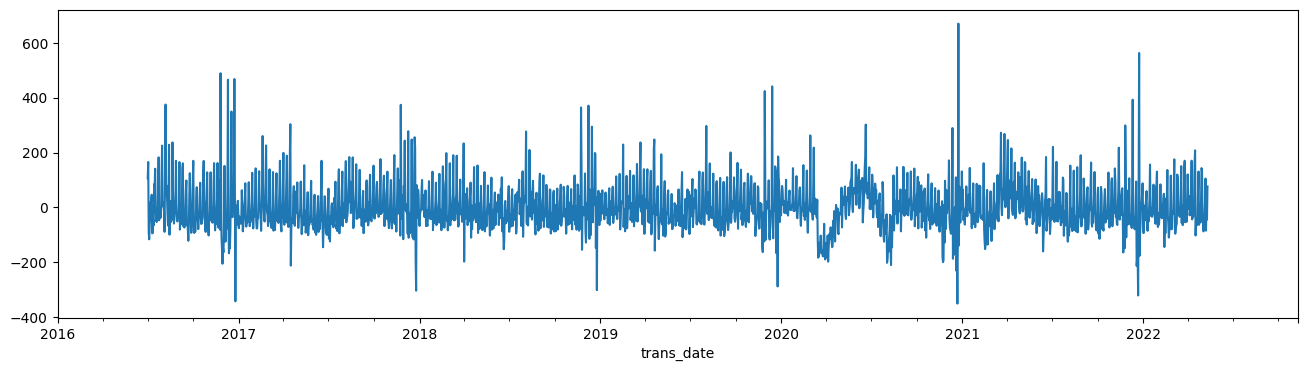

In [129]:
result12.resid.plot()

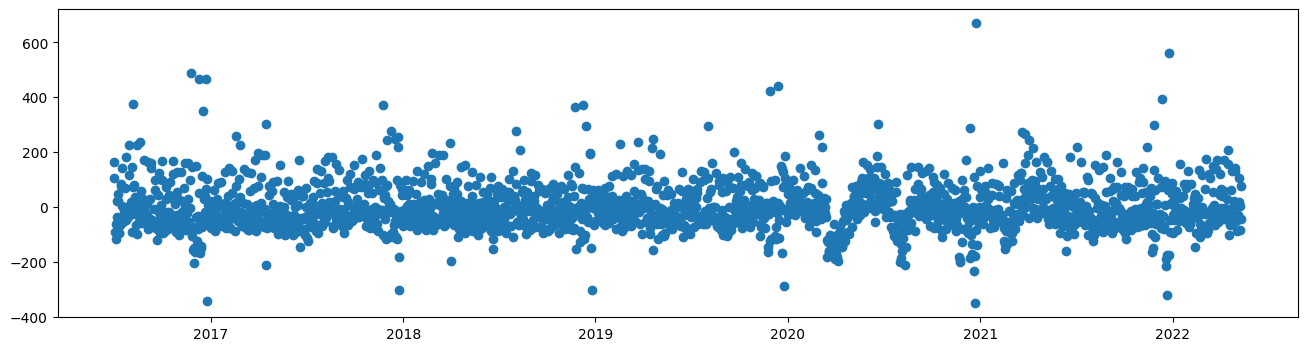

In [131]:
result12_resid = result12.resid.reset_index()
plt.scatter(result12_resid['trans_date'], result12_resid['resid'])

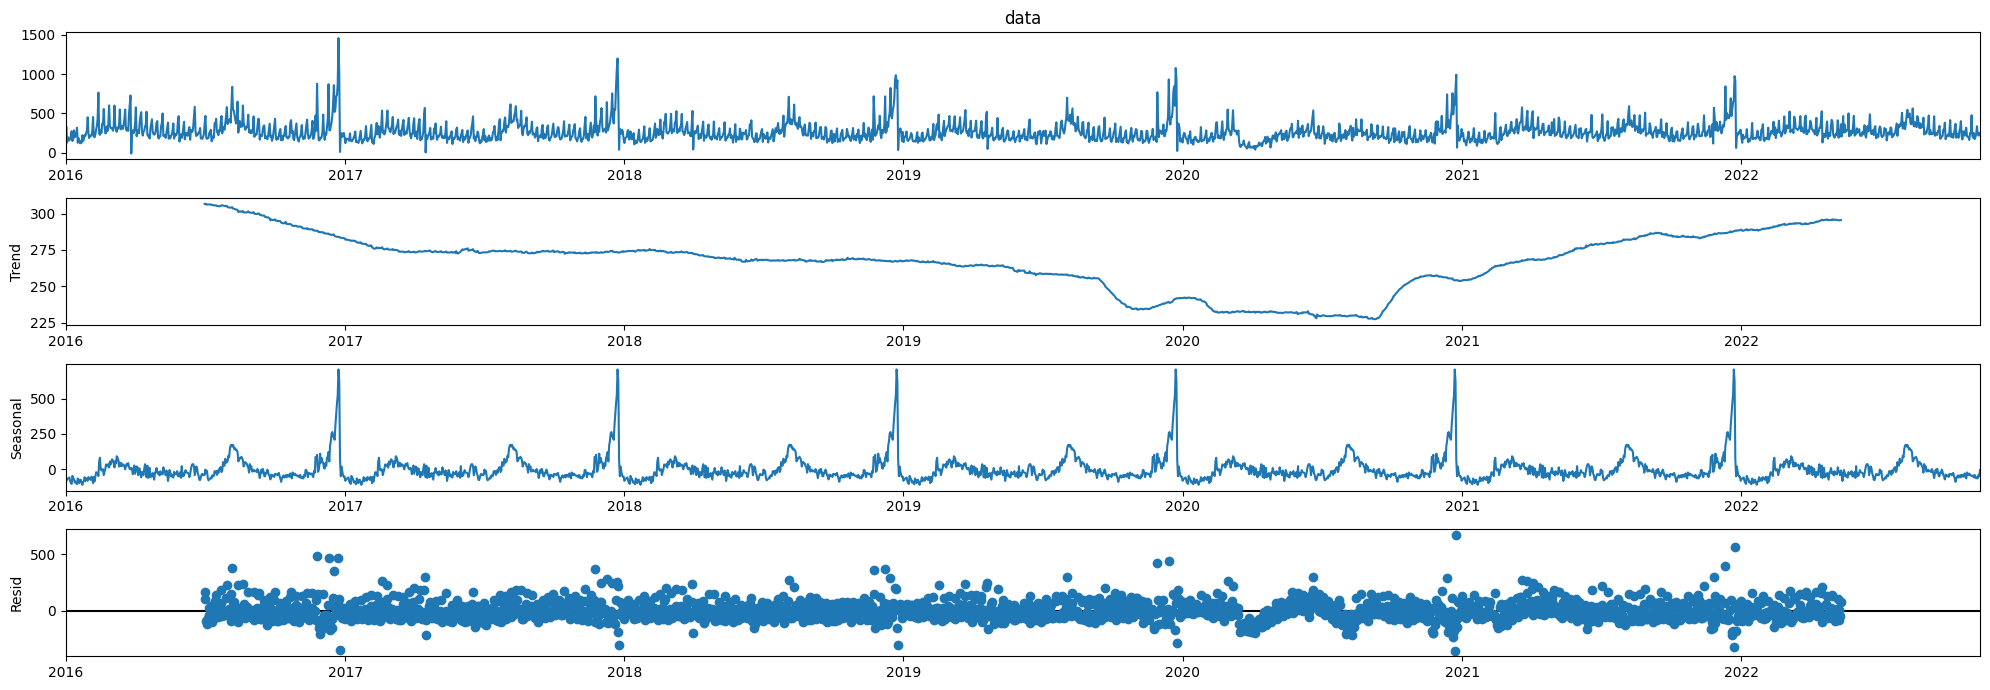

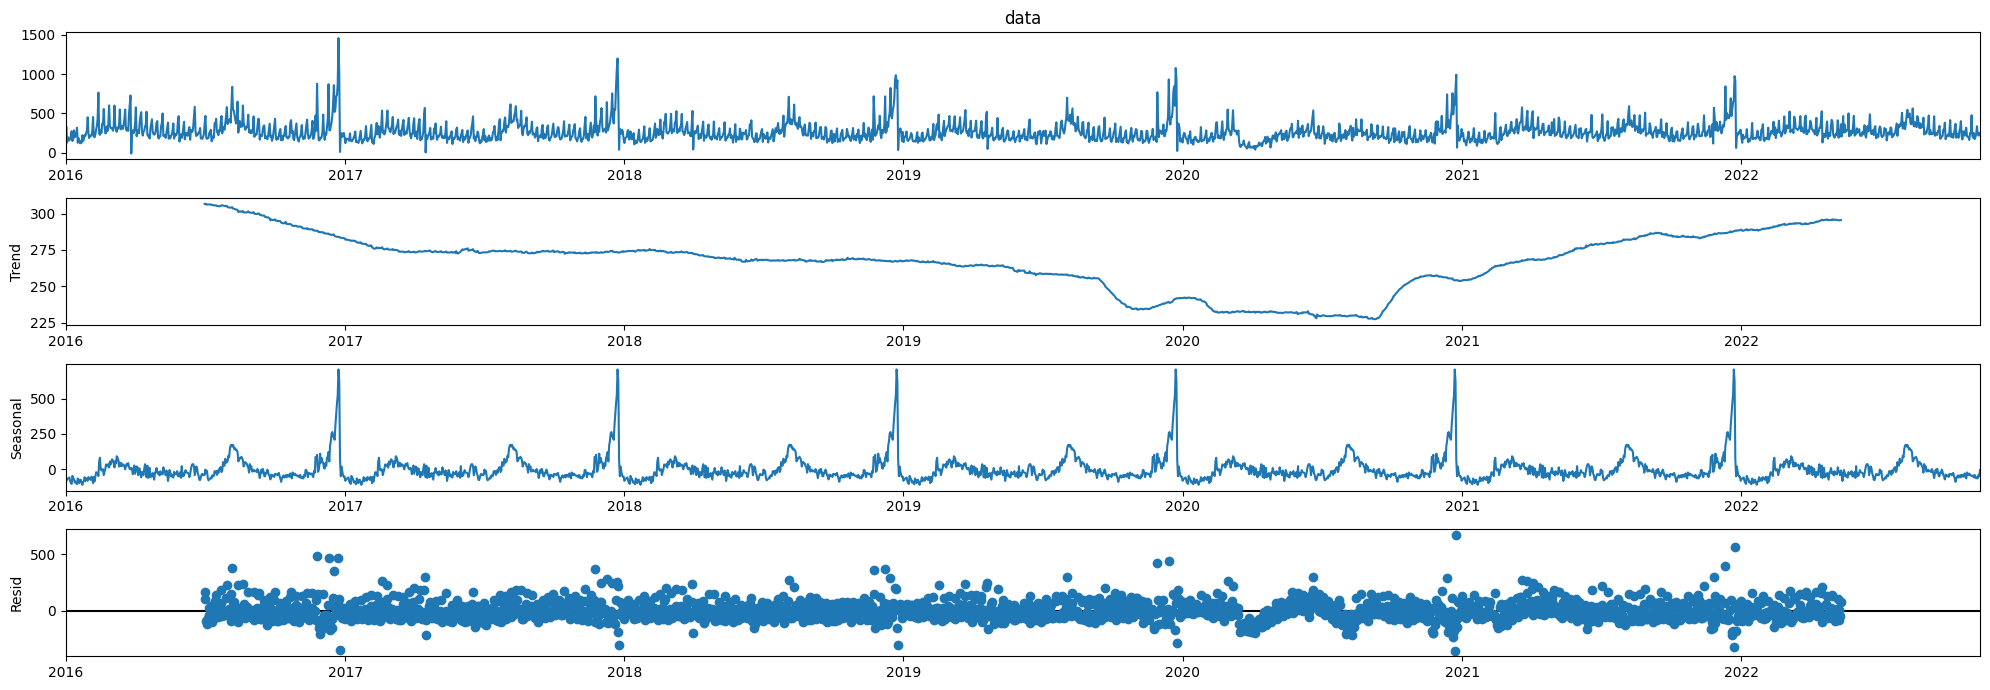

In [267]:
result12.plot()

In [148]:
company1_d1 = company1['data'].diff().dropna()

In [150]:
pp1 = PhillipsPerron(company1['data'])
print(pp1.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -34.590
P-value                         0.000
Lags                               27
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [151]:
pp11 = PhillipsPerron(company1_d1)
print(pp11.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic               -142.776
P-value                         0.000
Lags                               27
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


d:\Python3.9\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='data'>

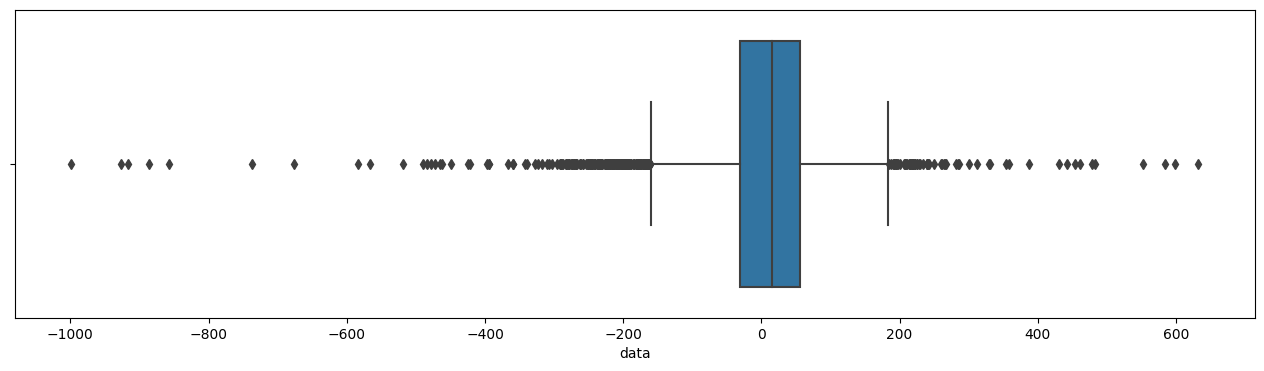

In [152]:
sns.boxplot(company1_d1)

The lower bound value is: -350.2980873426058
The upper bound value is: 350.3305875866154


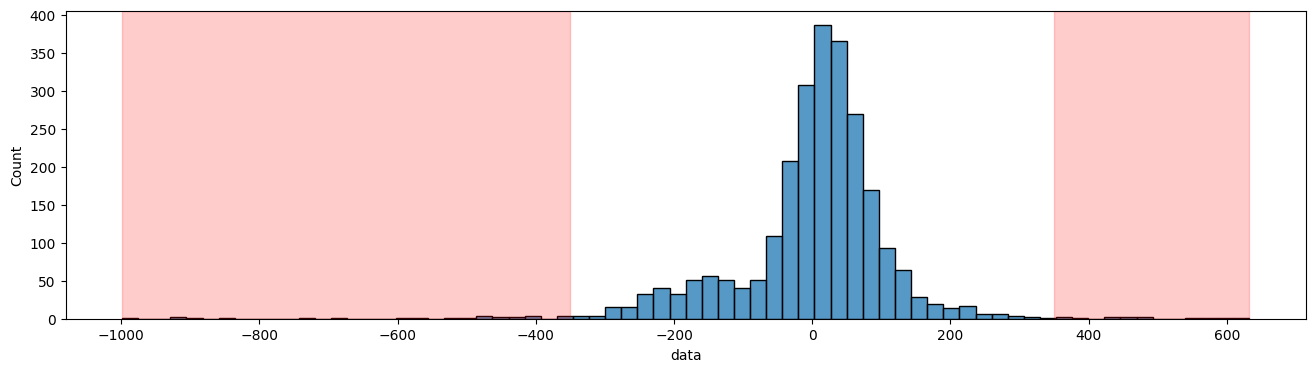

In [153]:
data_mean, data_std = company1_d1.mean(), company1_d1.std()
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

print('The lower bound value is:', data_mean - cut_off)
print('The upper bound value is:', data_mean + cut_off)

sns.histplot(company1_d1, bins=70)
plt.axvspan(xmin = lower,xmax= company1_d1.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= company1_d1.max(),alpha=0.2, color='red')

In [70]:
company2 = credit[credit["Unnamed: 0"] == company_list[2]]
company2.set_index('trans_date',inplace=True)

C:\Users\GuangruiXUE\AppData\Local\Temp\ipykernel_51956\4269188756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company2.dropna(inplace=True)


<AxesSubplot:xlabel='trans_date'>

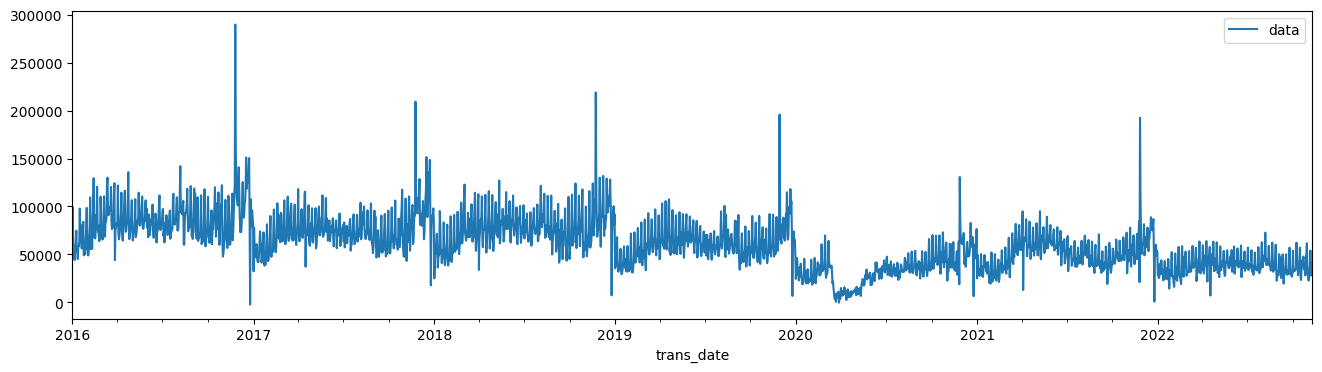

In [154]:
company2.dropna(inplace=True)
company2.plot()

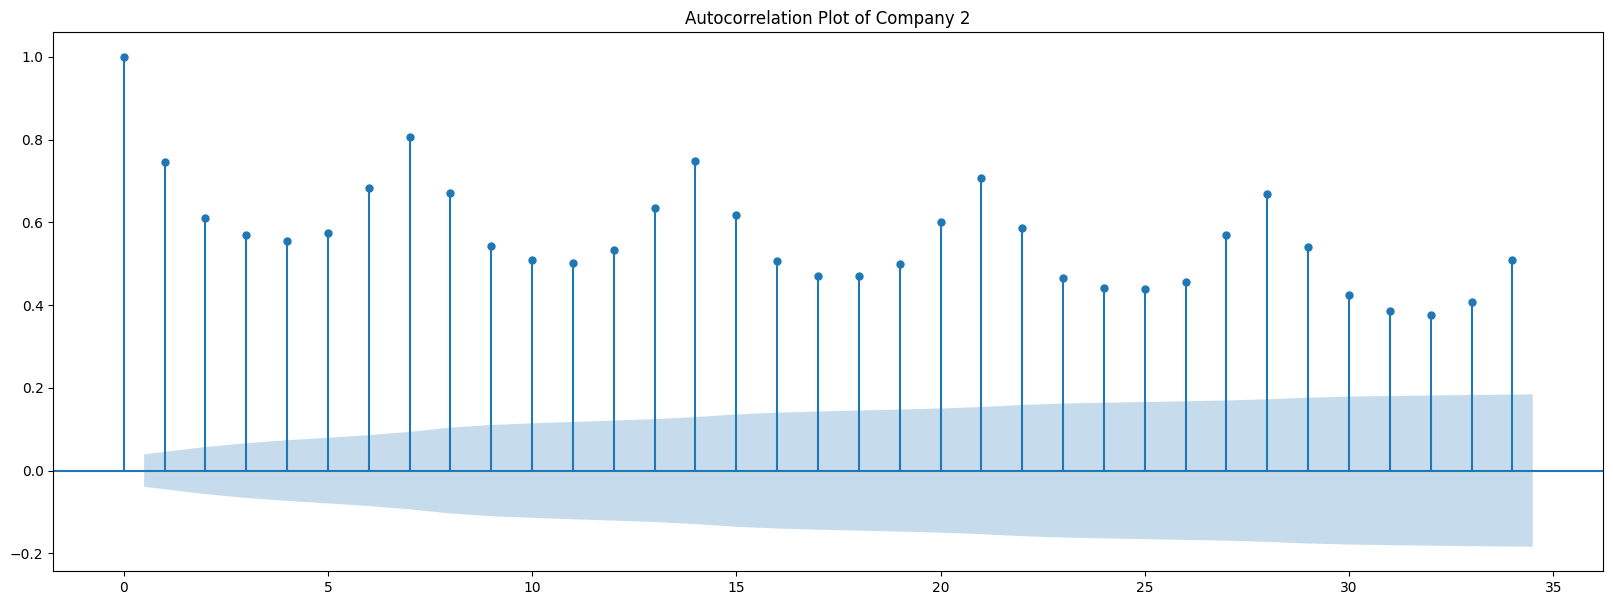

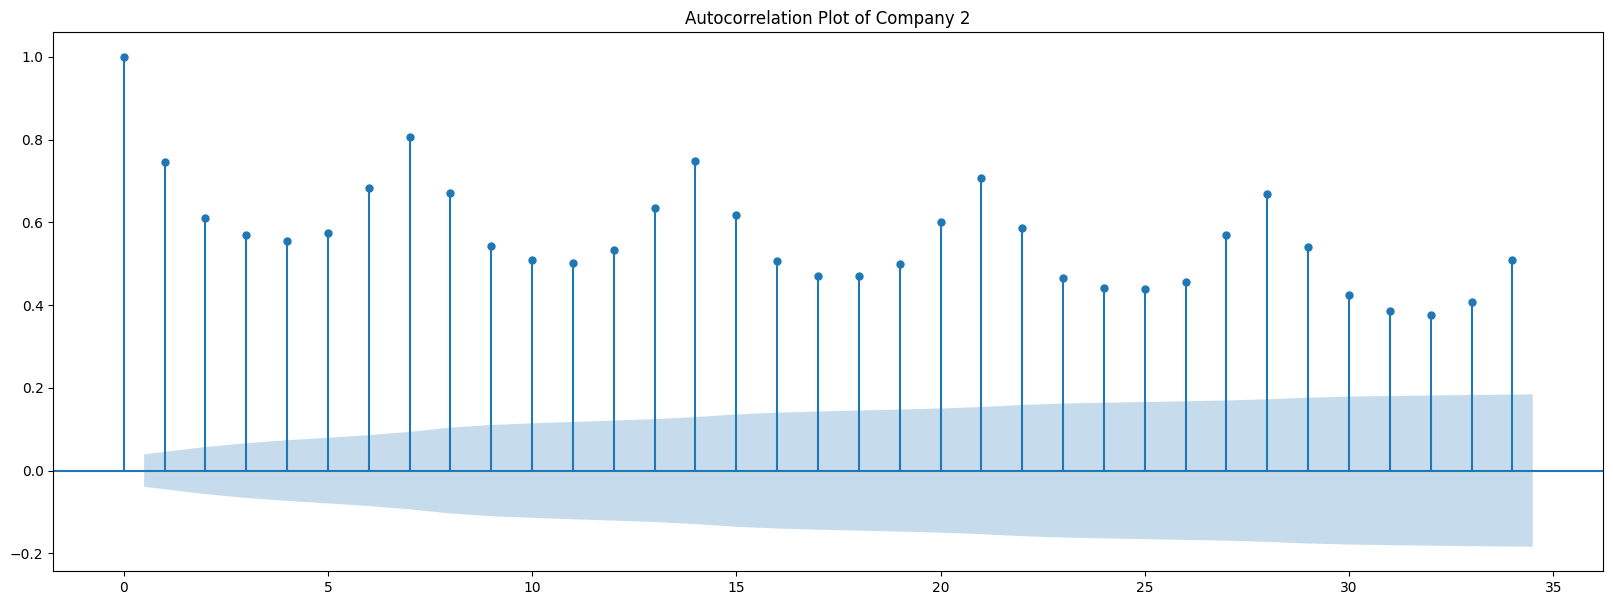

In [215]:
sm.graphics.tsa.plot_acf(company2['data'], title= "Autocorrelation Plot of Company 2")

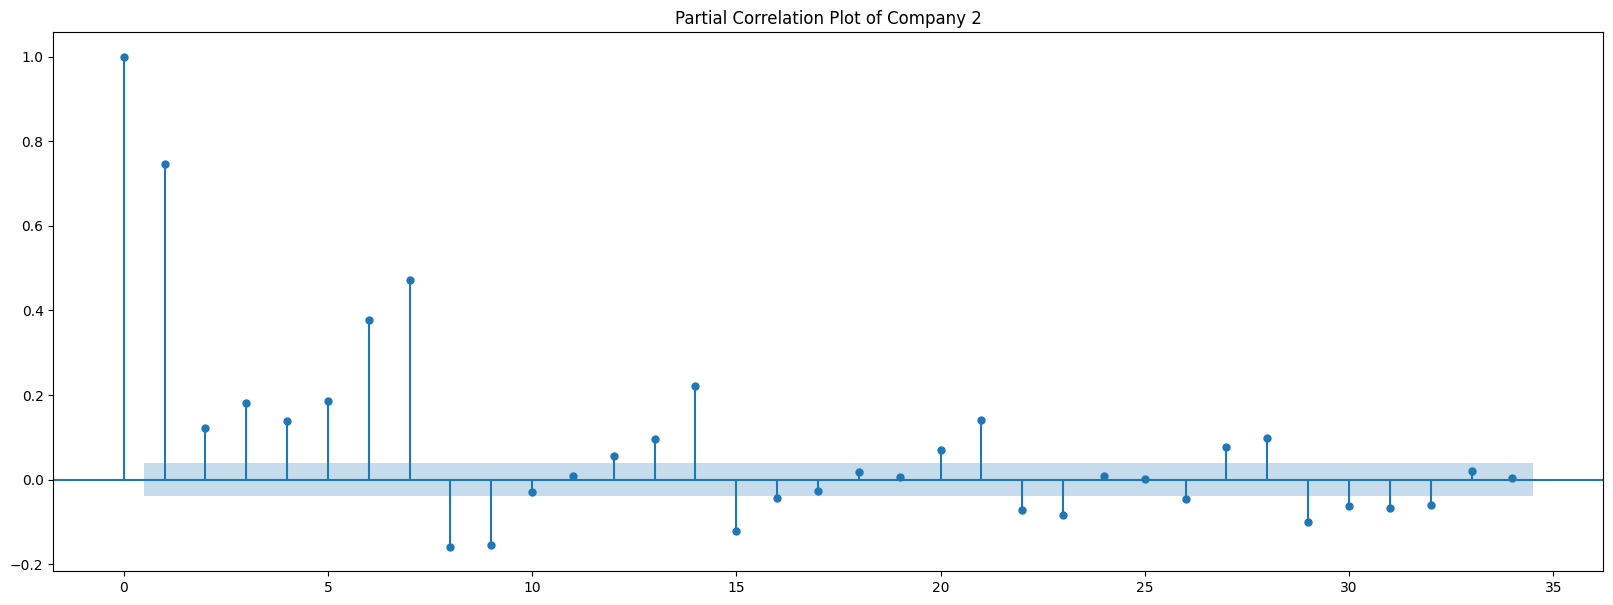

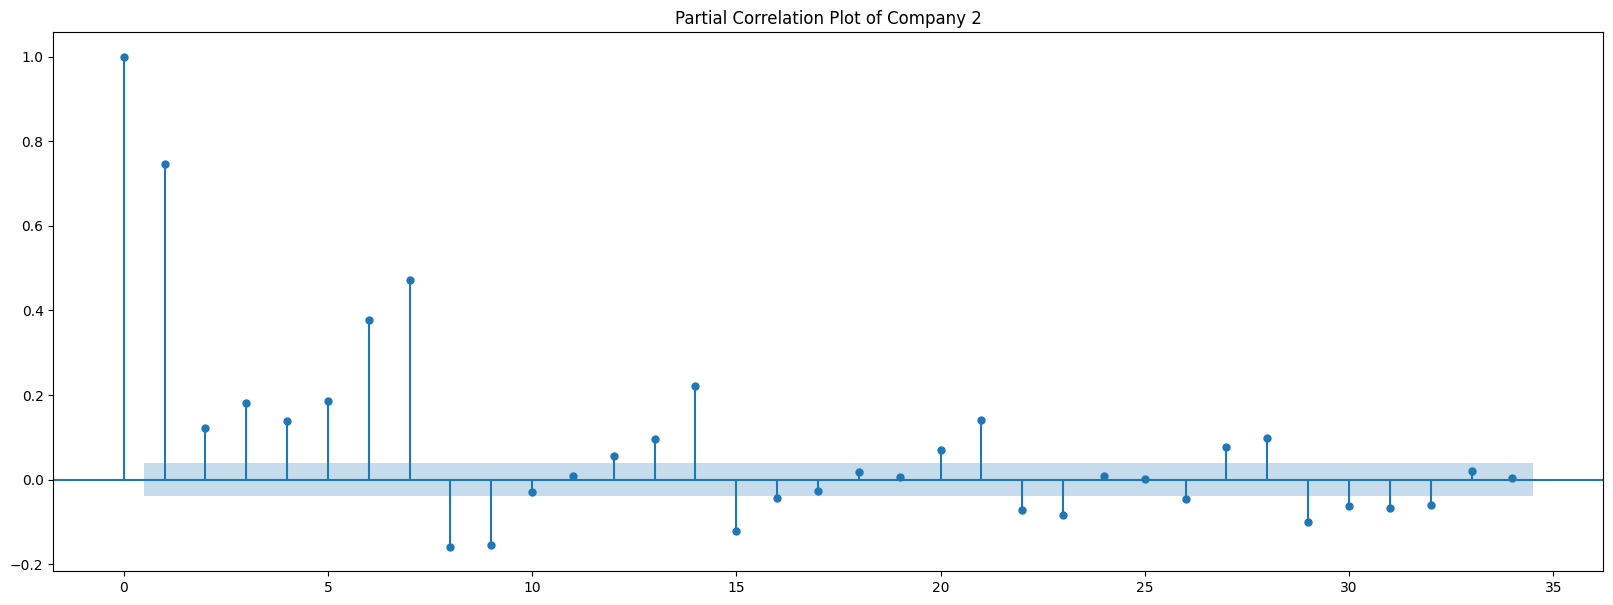

In [219]:
sm.graphics.tsa.plot_pacf(company2['data'], title = "Partial Correlation Plot of Company 2")

In [232]:
result21 = seasonal_decompose(company2['data'], period=7)

<AxesSubplot:xlabel='trans_date'>

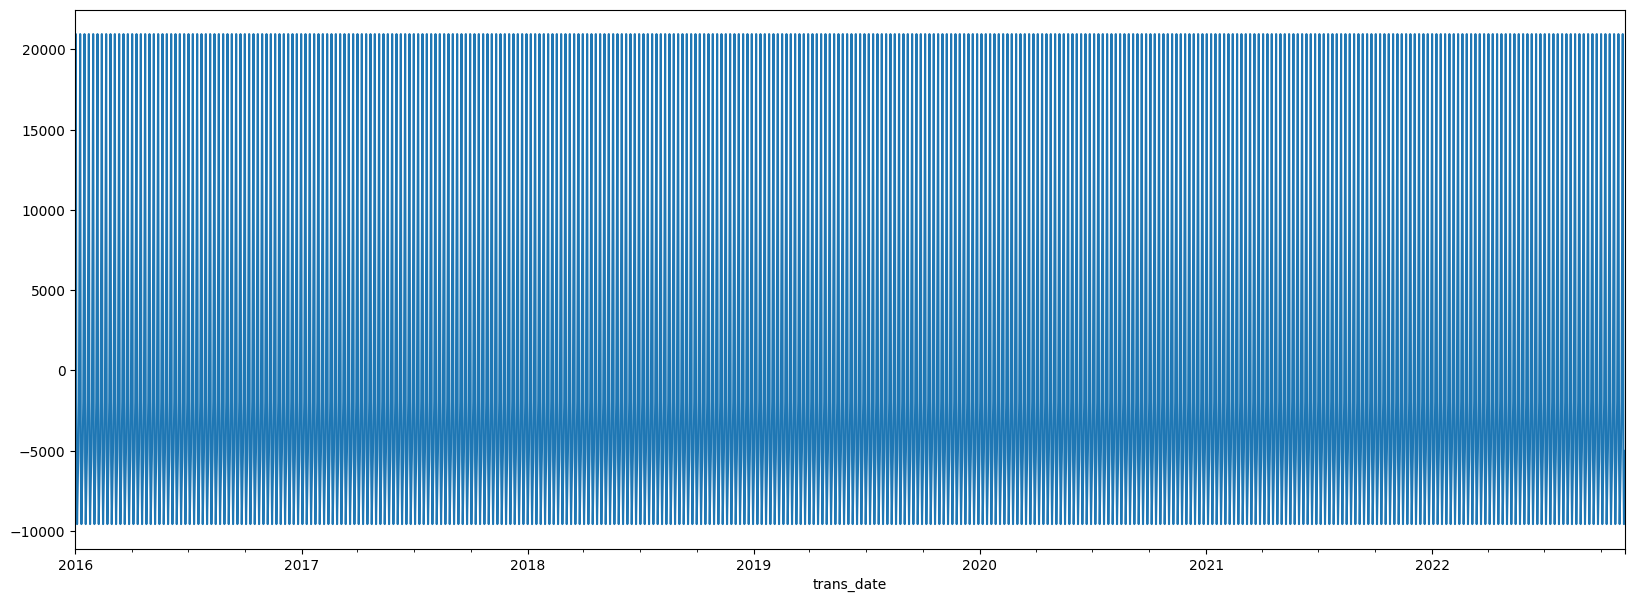

In [226]:
result21.seasonal.plot()

<AxesSubplot:xlabel='trans_date'>

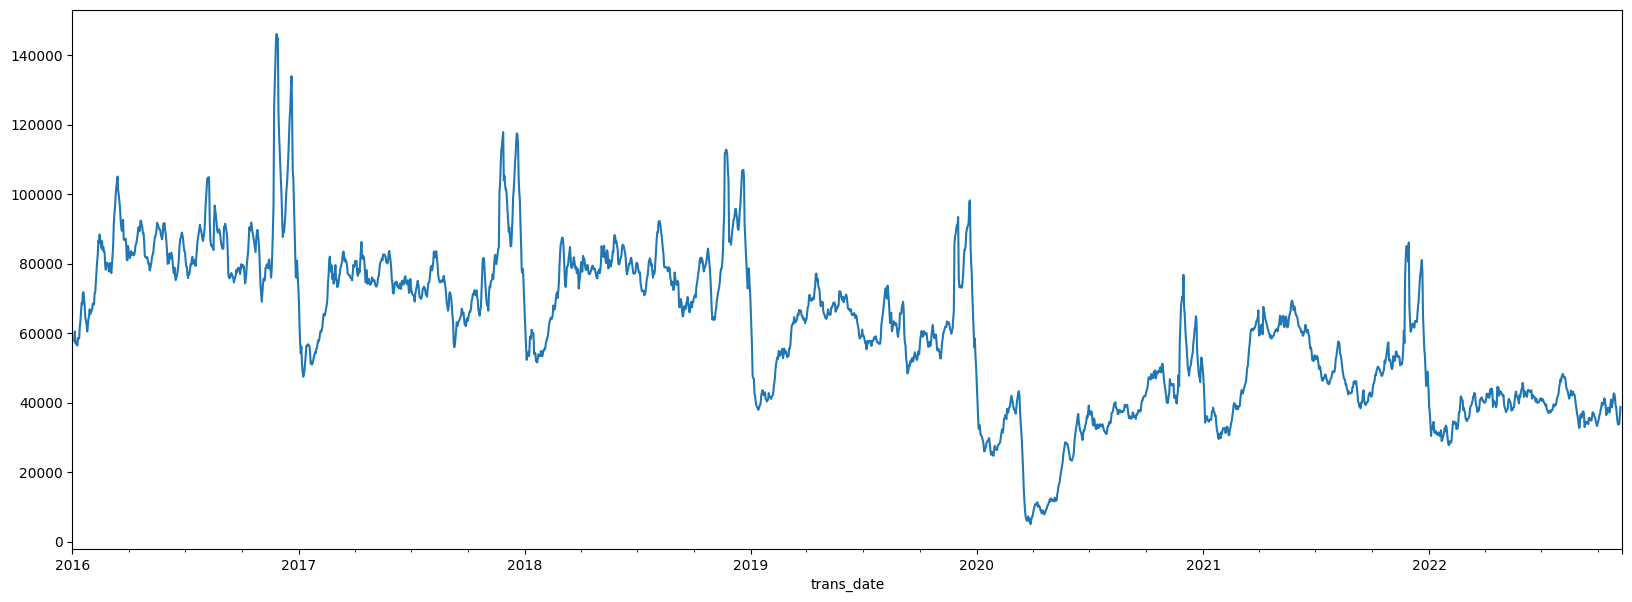

In [227]:
result21.trend.plot()

<AxesSubplot:xlabel='trans_date'>

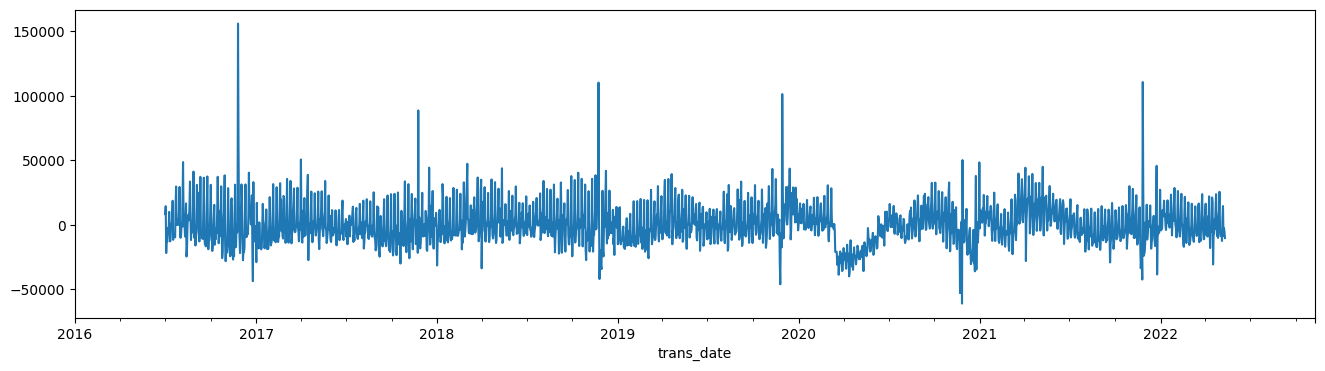

In [165]:
result21.resid.plot()

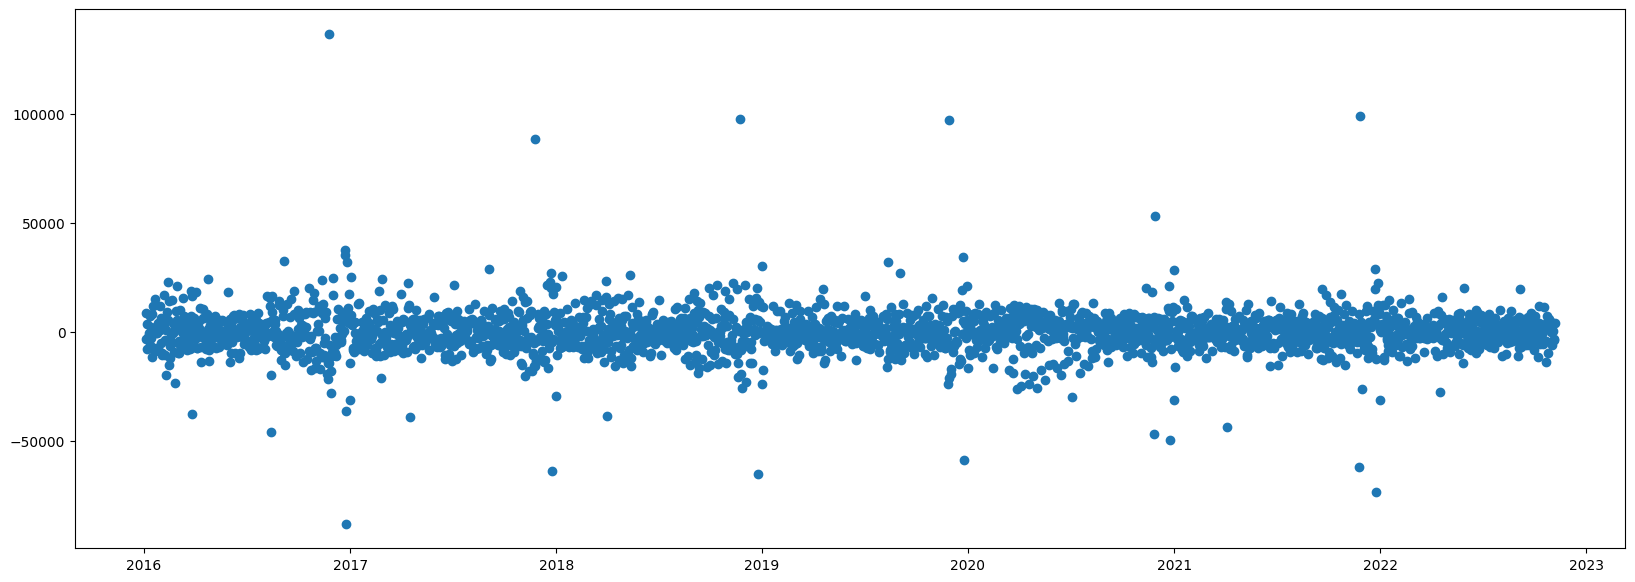

In [228]:
result21_resid = result21.resid.reset_index()
plt.scatter(result21_resid['trans_date'], result21_resid['resid'])

In [235]:
result22 = seasonal_decompose(company2['data'], period=365)

<AxesSubplot:xlabel='trans_date'>

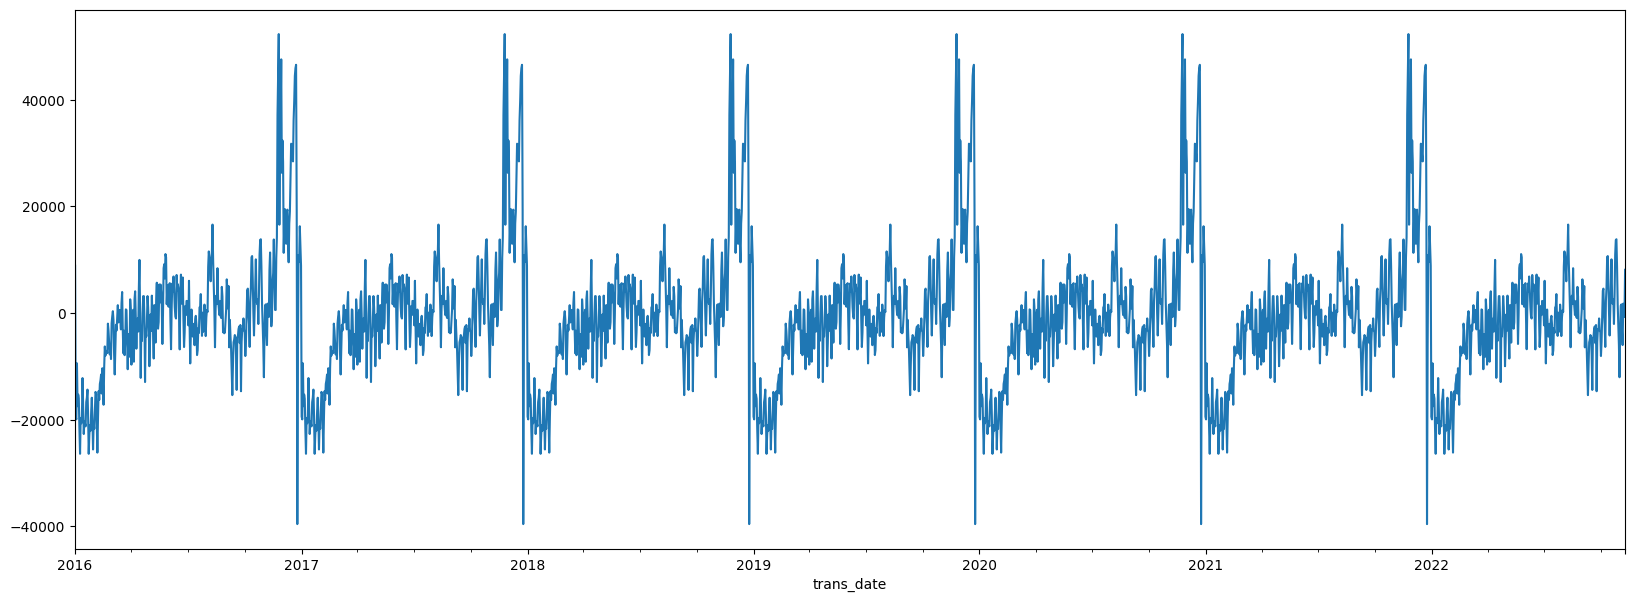

In [236]:
result22.seasonal.plot()

<AxesSubplot:xlabel='trans_date'>

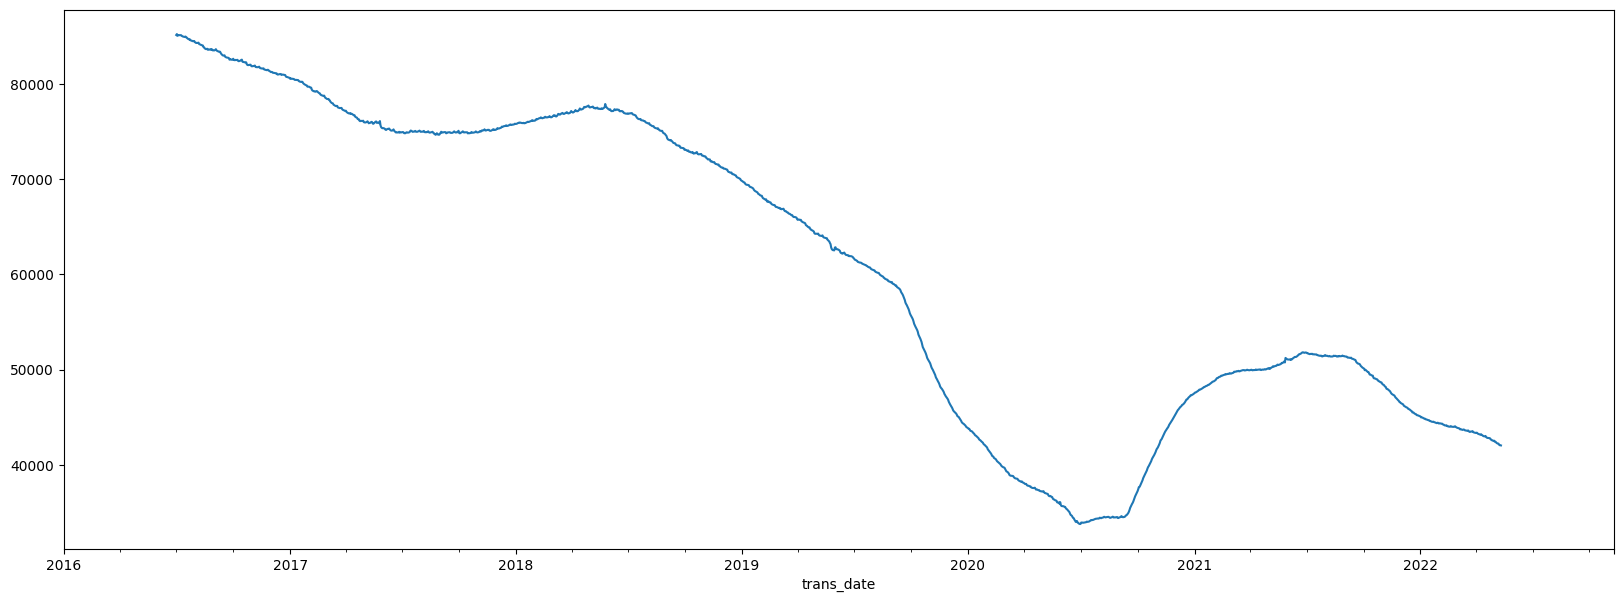

In [237]:
result22.trend.plot()

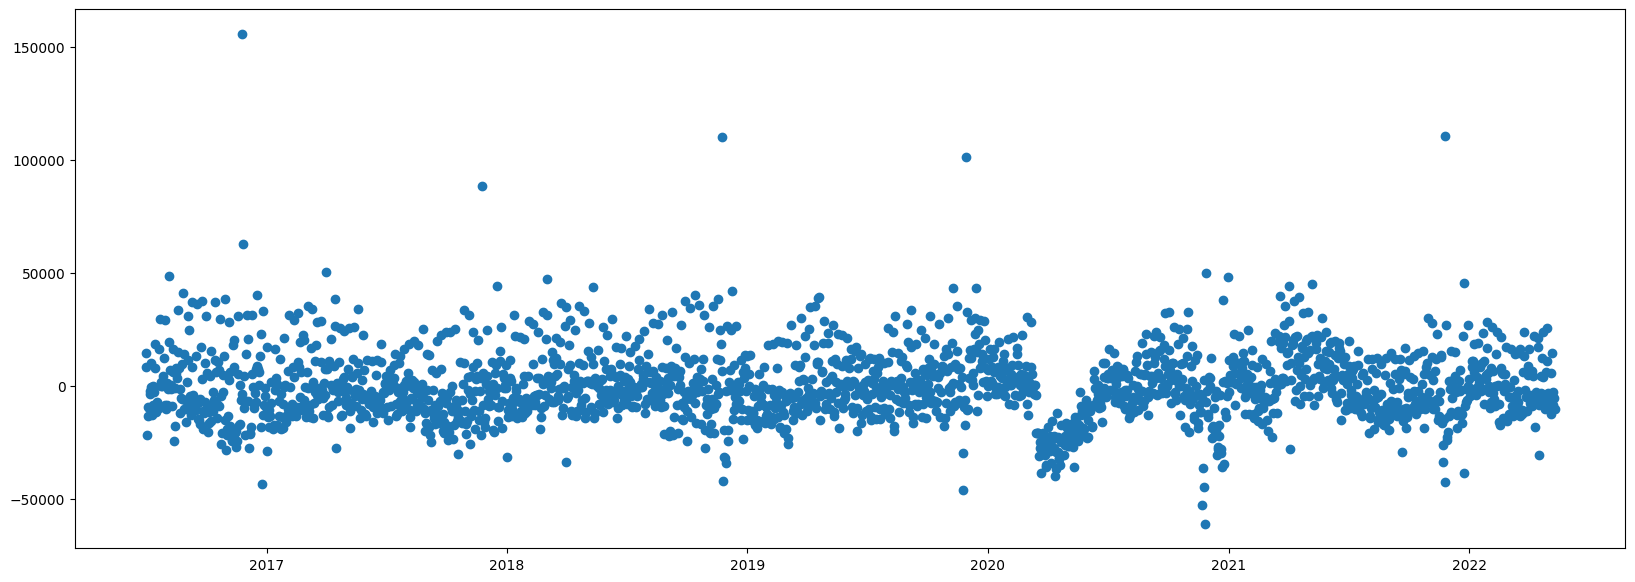

In [238]:
result22_resid = result22.resid.reset_index()
plt.scatter(result22_resid['trans_date'], result22_resid['resid'])

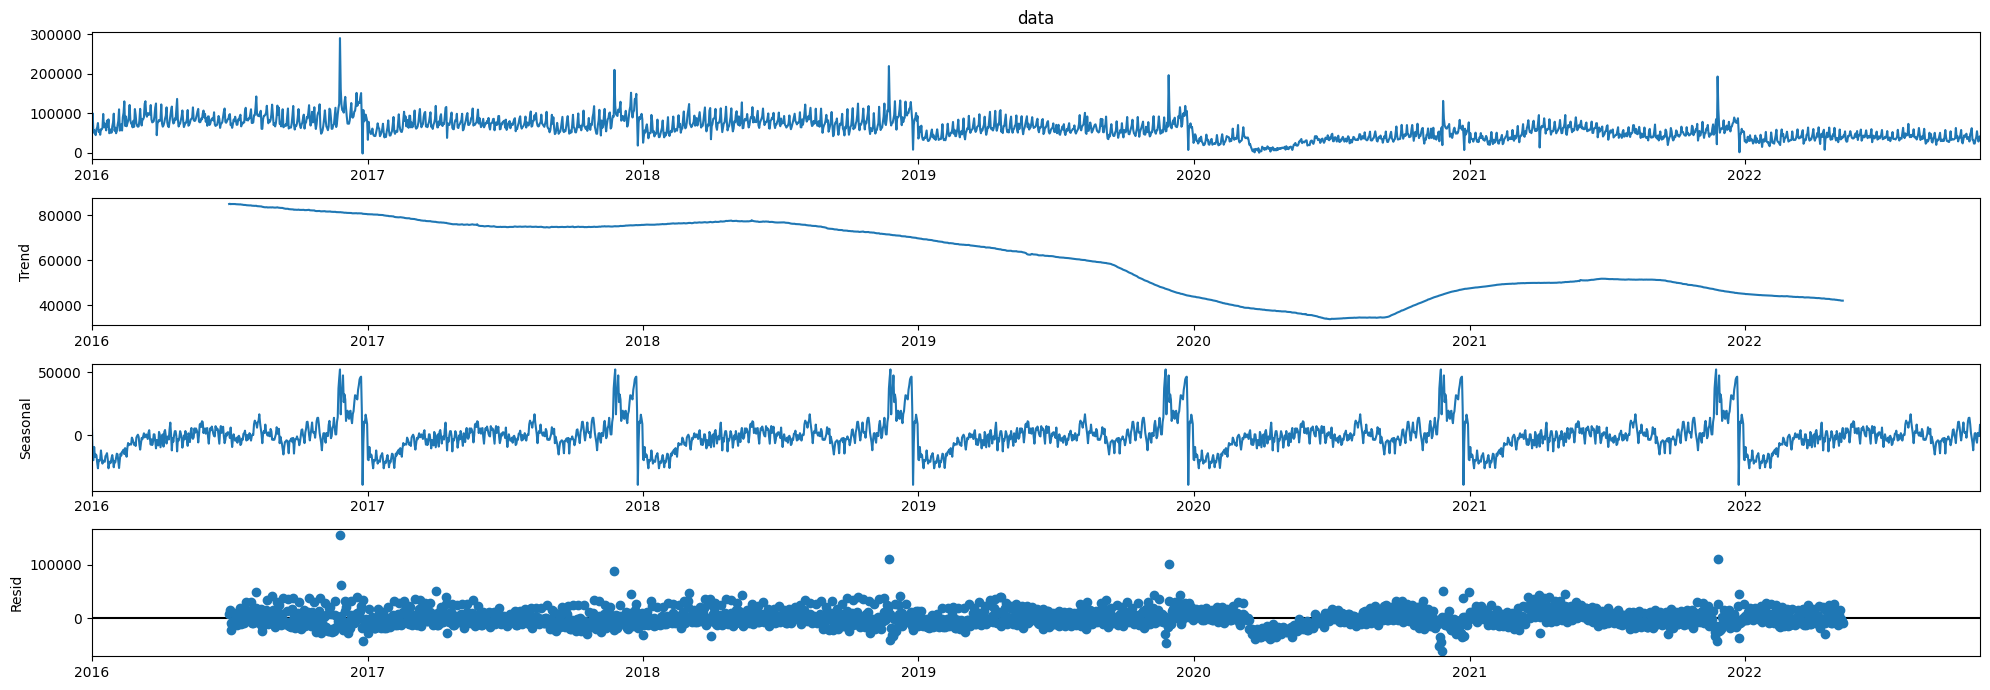

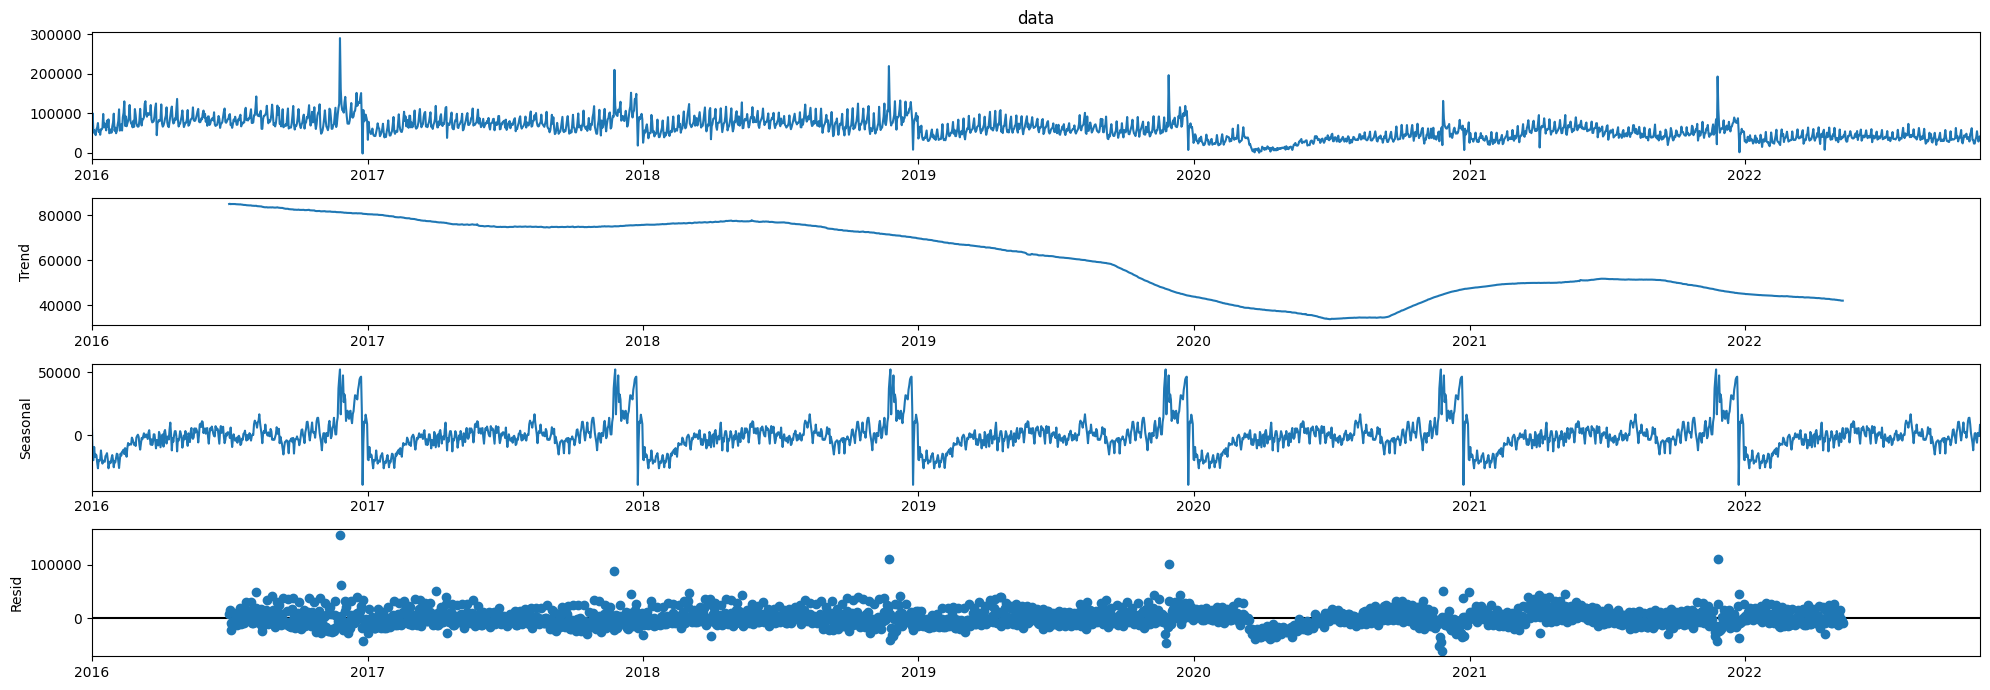

In [239]:
result22.plot()

In [167]:
company2_d1 = company2['data'].diff().dropna()

In [168]:
pp2 = PhillipsPerron(company2_d1)
print(pp2.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic               -159.036
P-value                         0.000
Lags                               27
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


d:\Python3.9\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='data'>

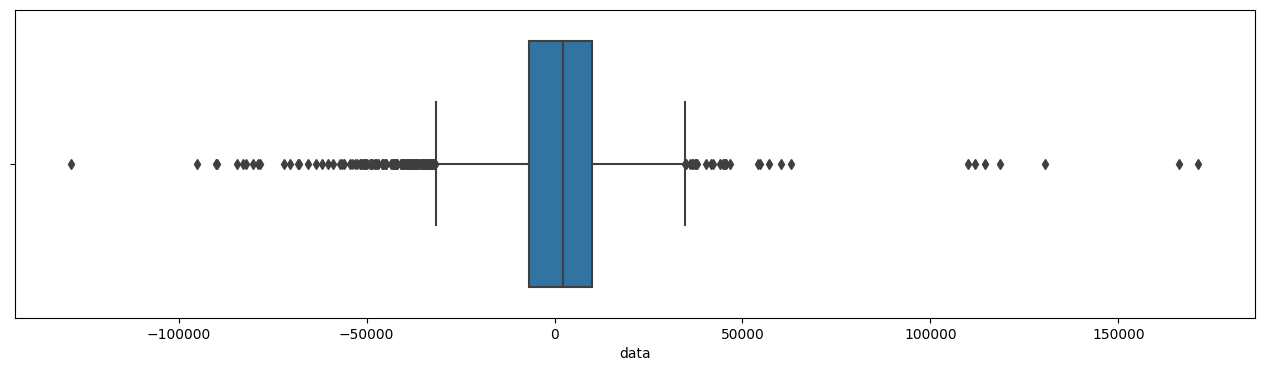

In [170]:
sns.boxplot(company2_d1)

The lower bound value is: -55762.98574615291
The upper bound value is: 55760.20921937975


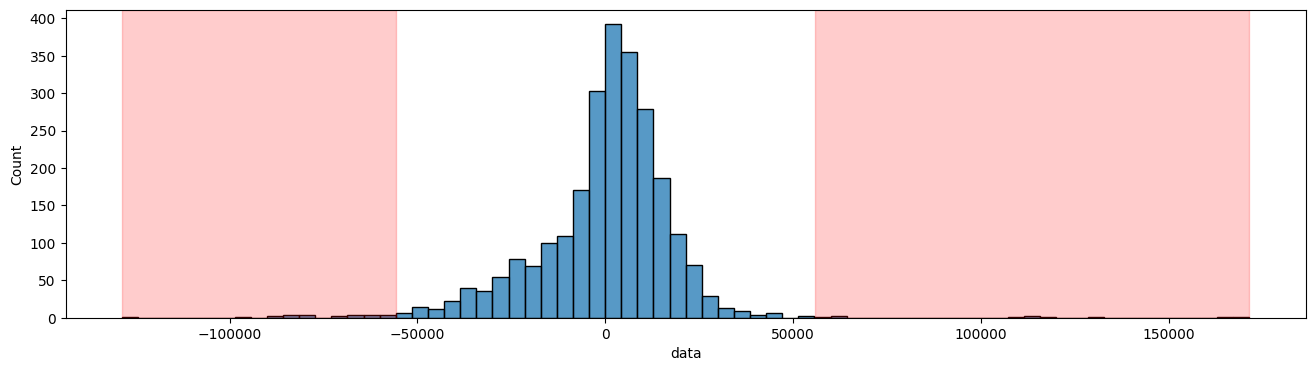

In [171]:
data_mean, data_std = company2_d1.mean(), company2_d1.std()
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

print('The lower bound value is:', data_mean - cut_off)
print('The upper bound value is:', data_mean + cut_off)

sns.histplot(company2_d1, bins=70)
plt.axvspan(xmin = lower,xmax= company2_d1.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= company2_d1.max(),alpha=0.2, color='red')

In [71]:
company3 = credit[credit["Unnamed: 0"] == company_list[3]]
company3.set_index('trans_date',inplace=True)

C:\Users\GuangruiXUE\AppData\Local\Temp\ipykernel_51956\1118510682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company3.dropna(inplace=True)


<AxesSubplot:xlabel='trans_date'>

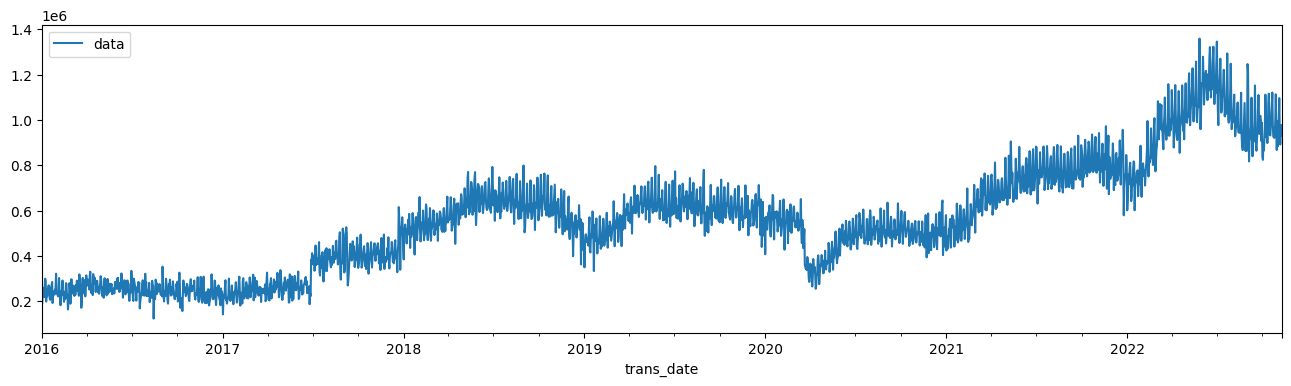

In [172]:
company3.dropna(inplace=True)
company3.plot()

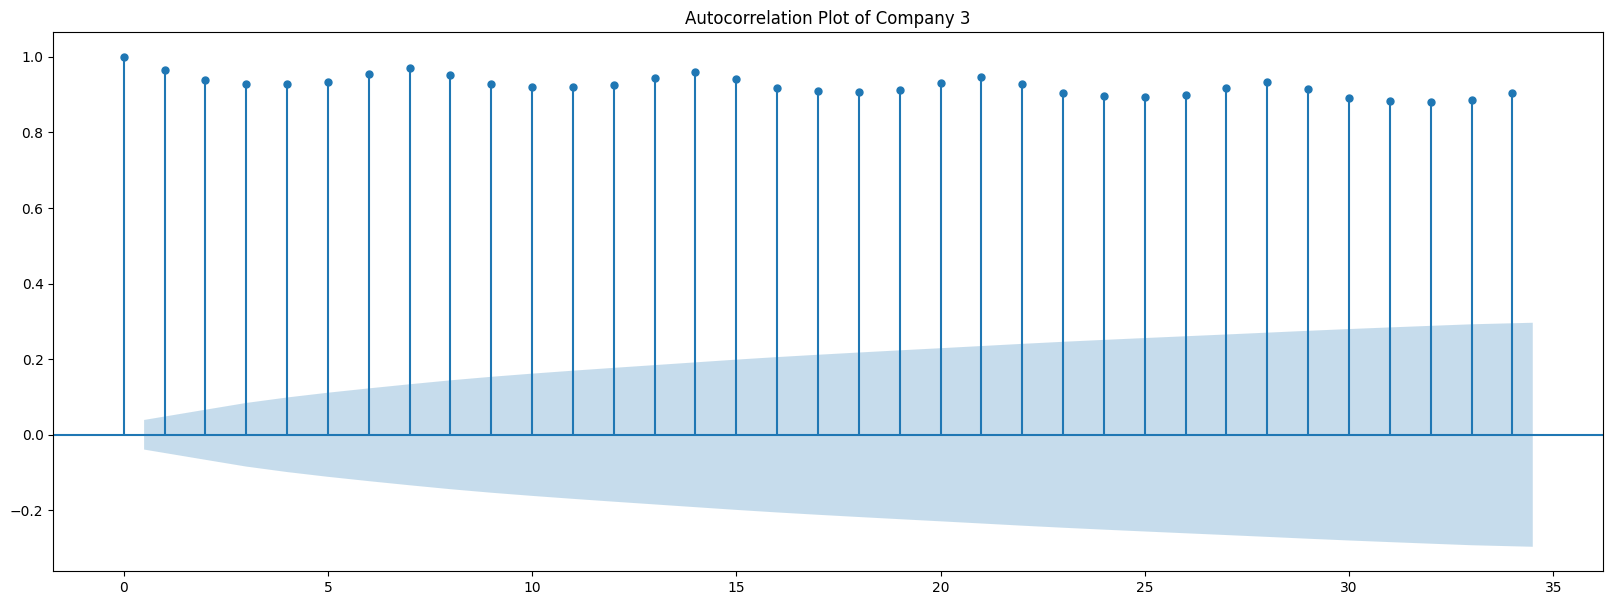

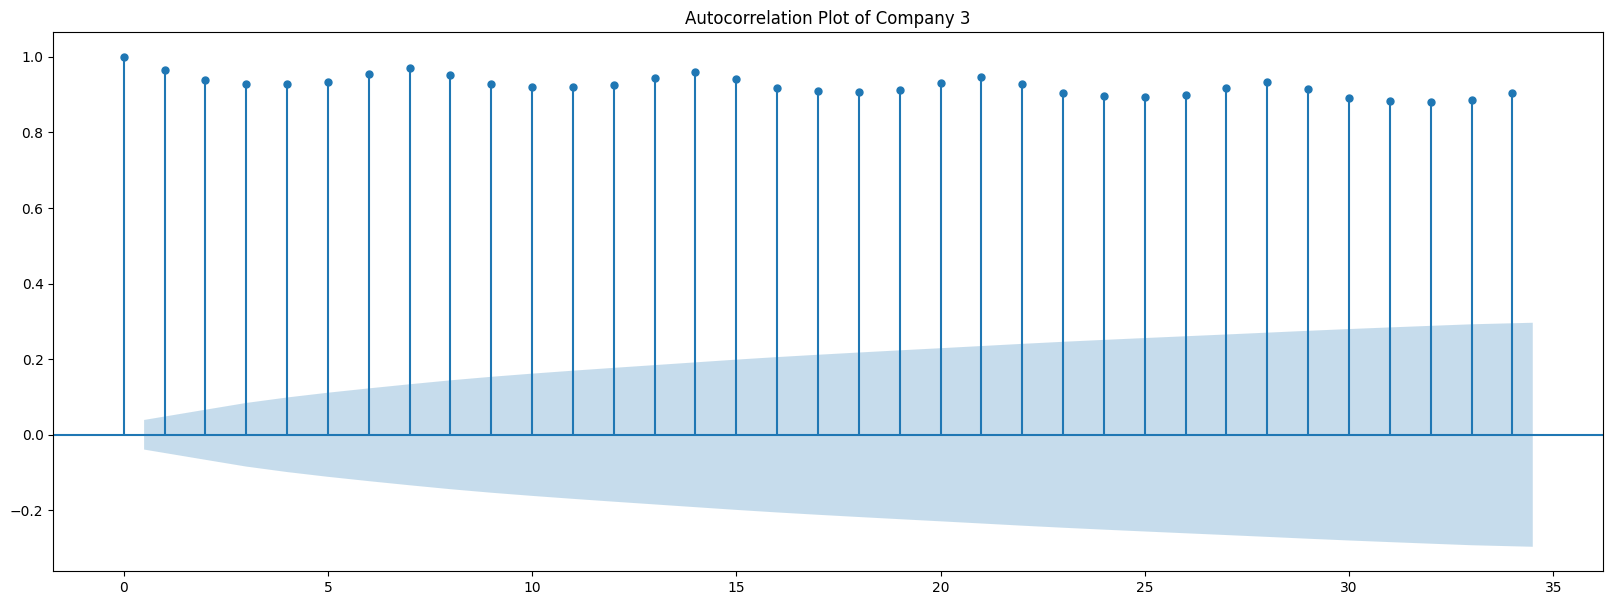

In [216]:
sm.graphics.tsa.plot_acf(company3['data'], title= "Autocorrelation Plot of Company 3")

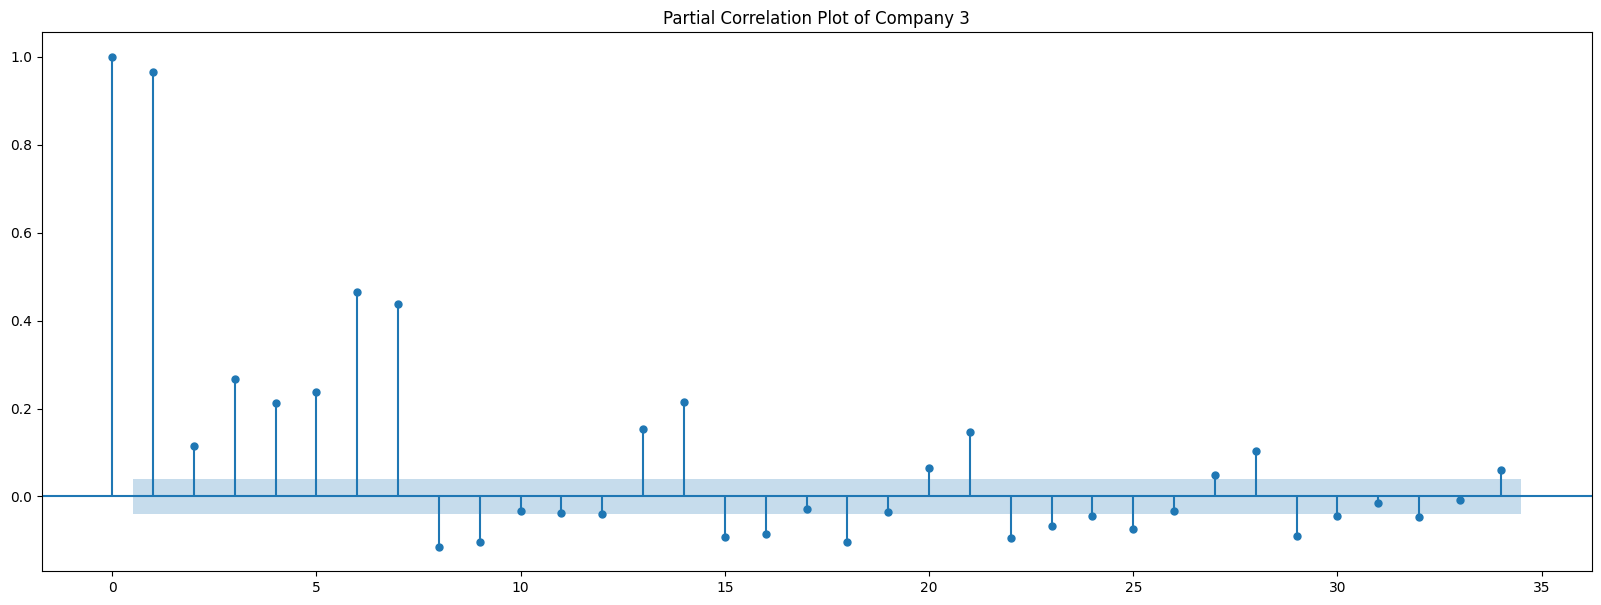

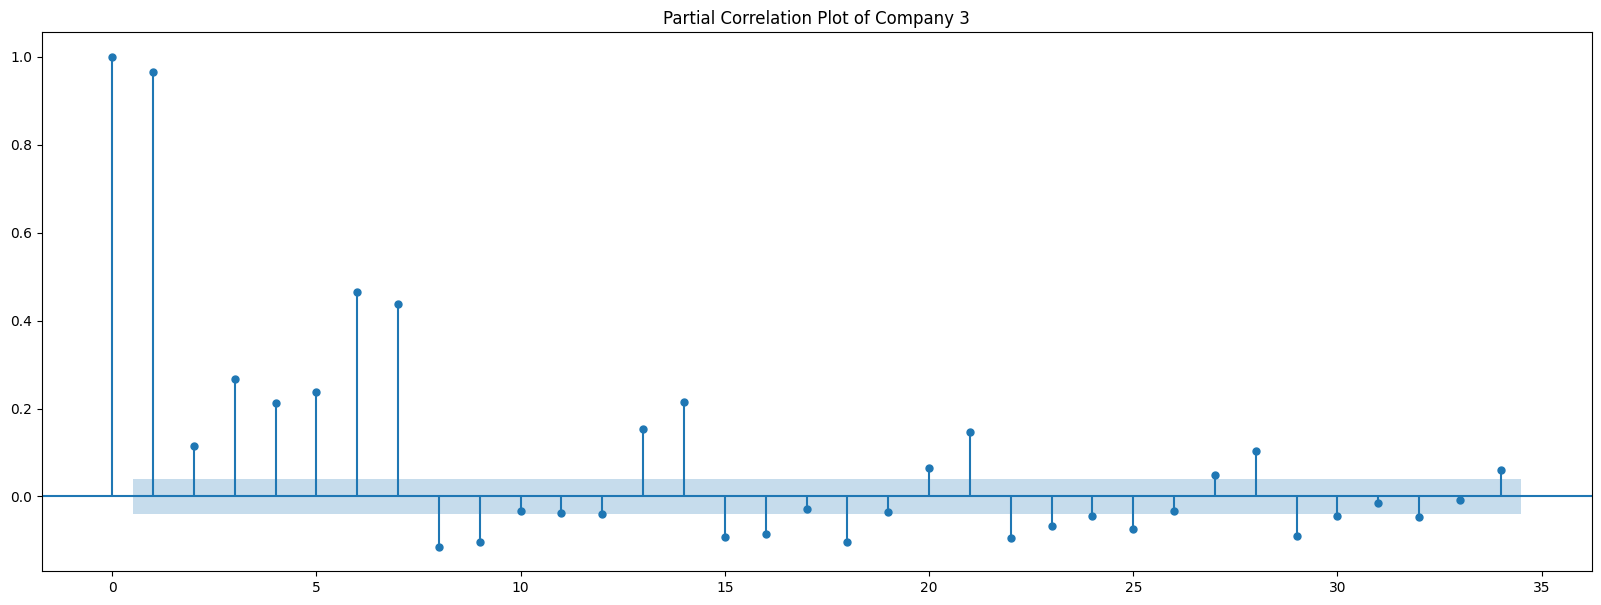

In [220]:
sm.graphics.tsa.plot_pacf(company3['data'], title = "Partial Correlation Plot of Company 3")

In [183]:
result31 = seasonal_decompose(company3['data'], period=7)

<AxesSubplot:xlabel='trans_date'>

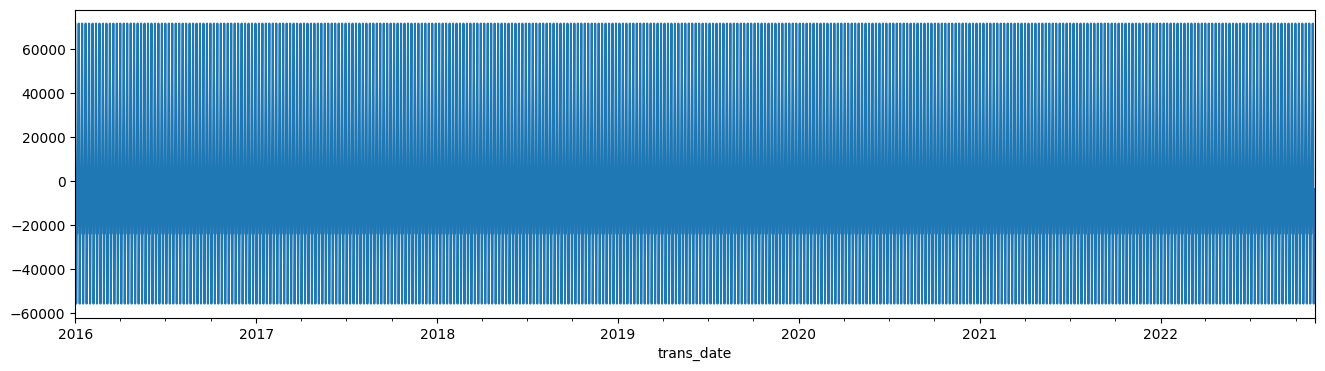

In [184]:
result31.seasonal.plot()

<AxesSubplot:xlabel='trans_date'>

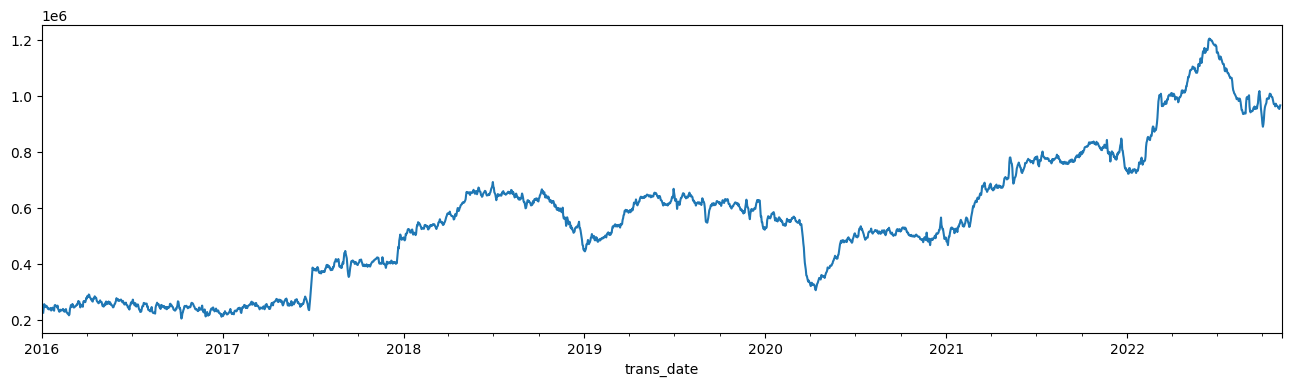

In [185]:
result31.trend.plot()

<AxesSubplot:xlabel='trans_date'>

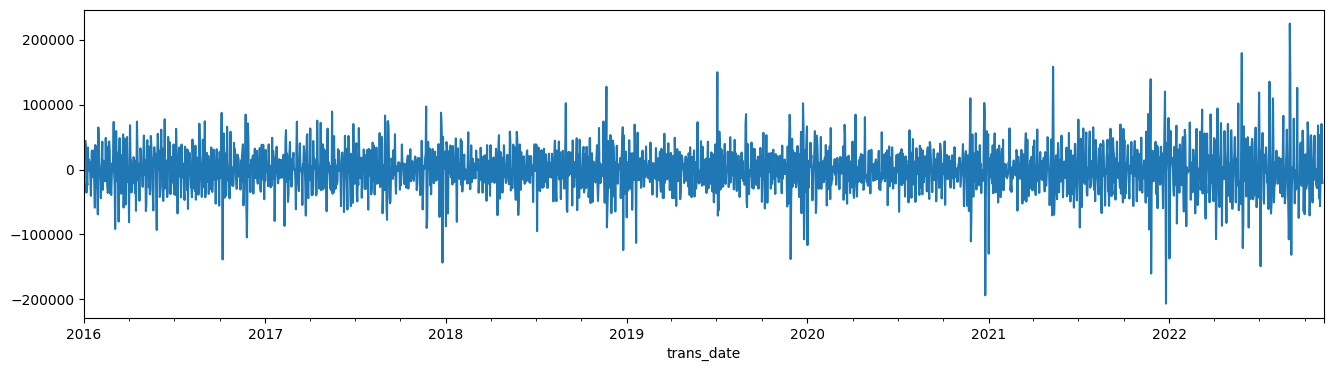

In [186]:
result31.resid.plot()

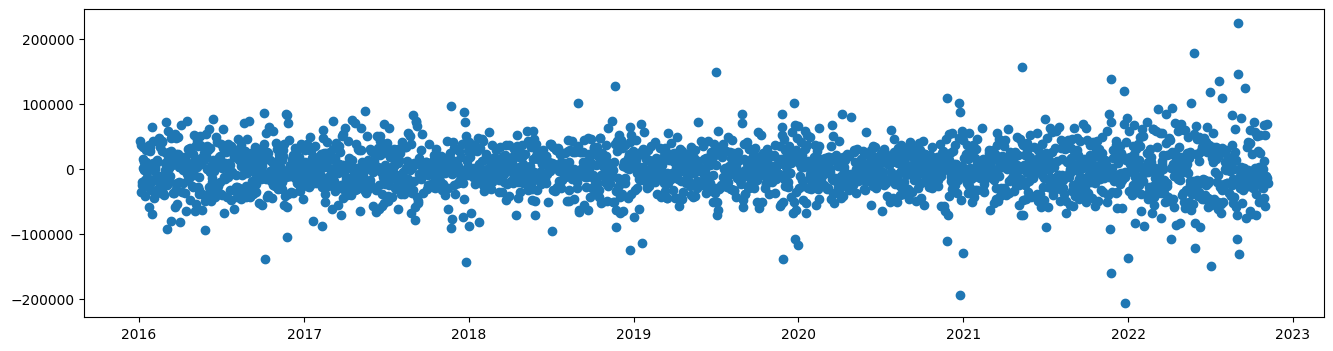

In [187]:
result31_resid = result31.resid.reset_index()
plt.scatter(result31_resid['trans_date'], result31_resid['resid'])

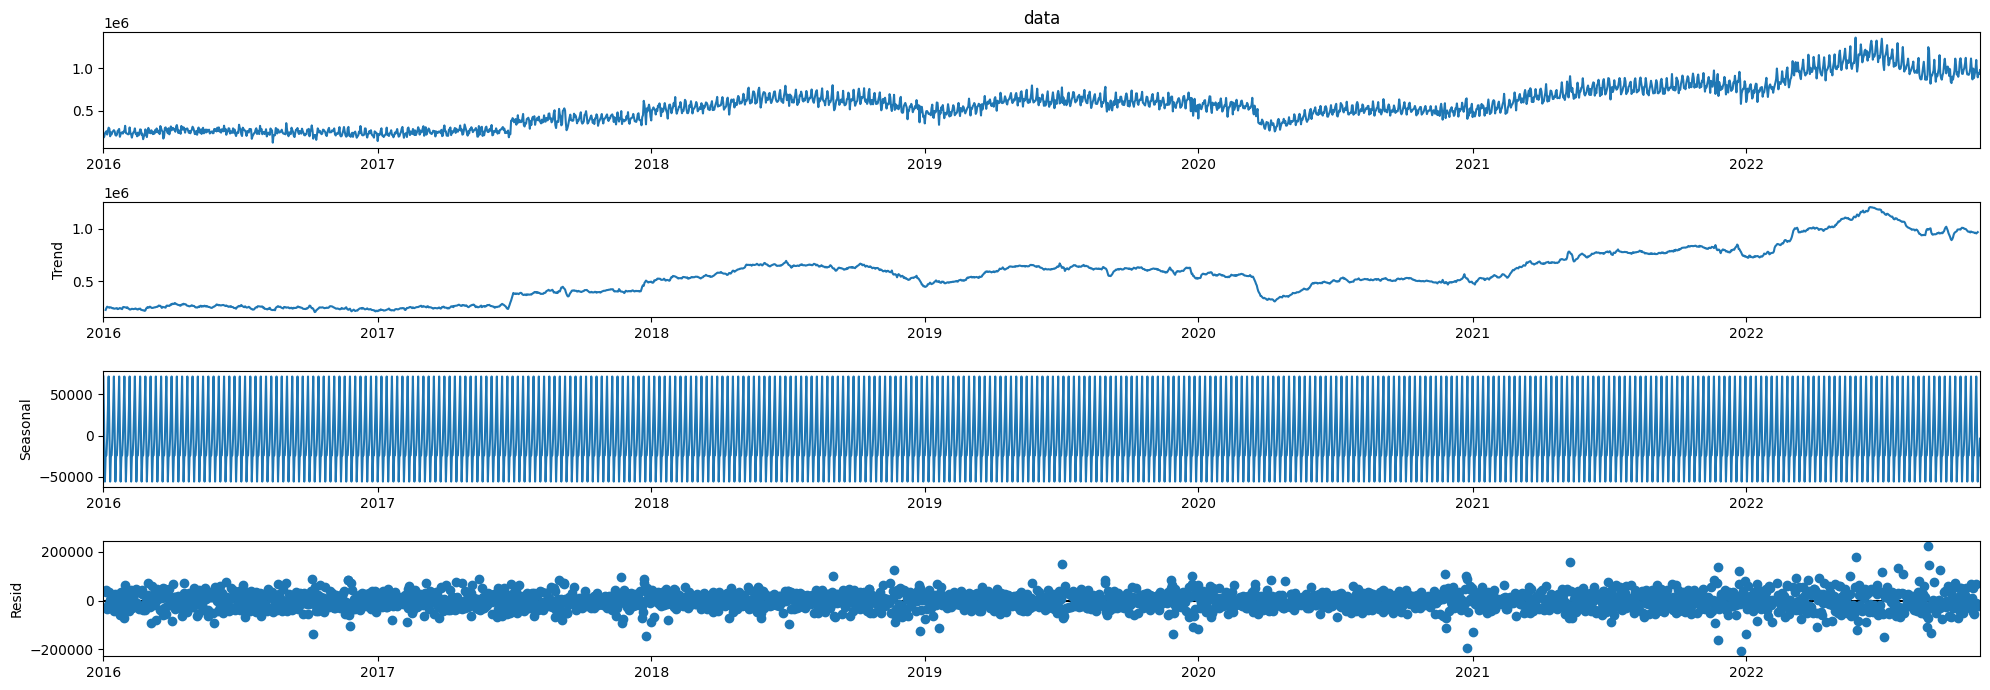

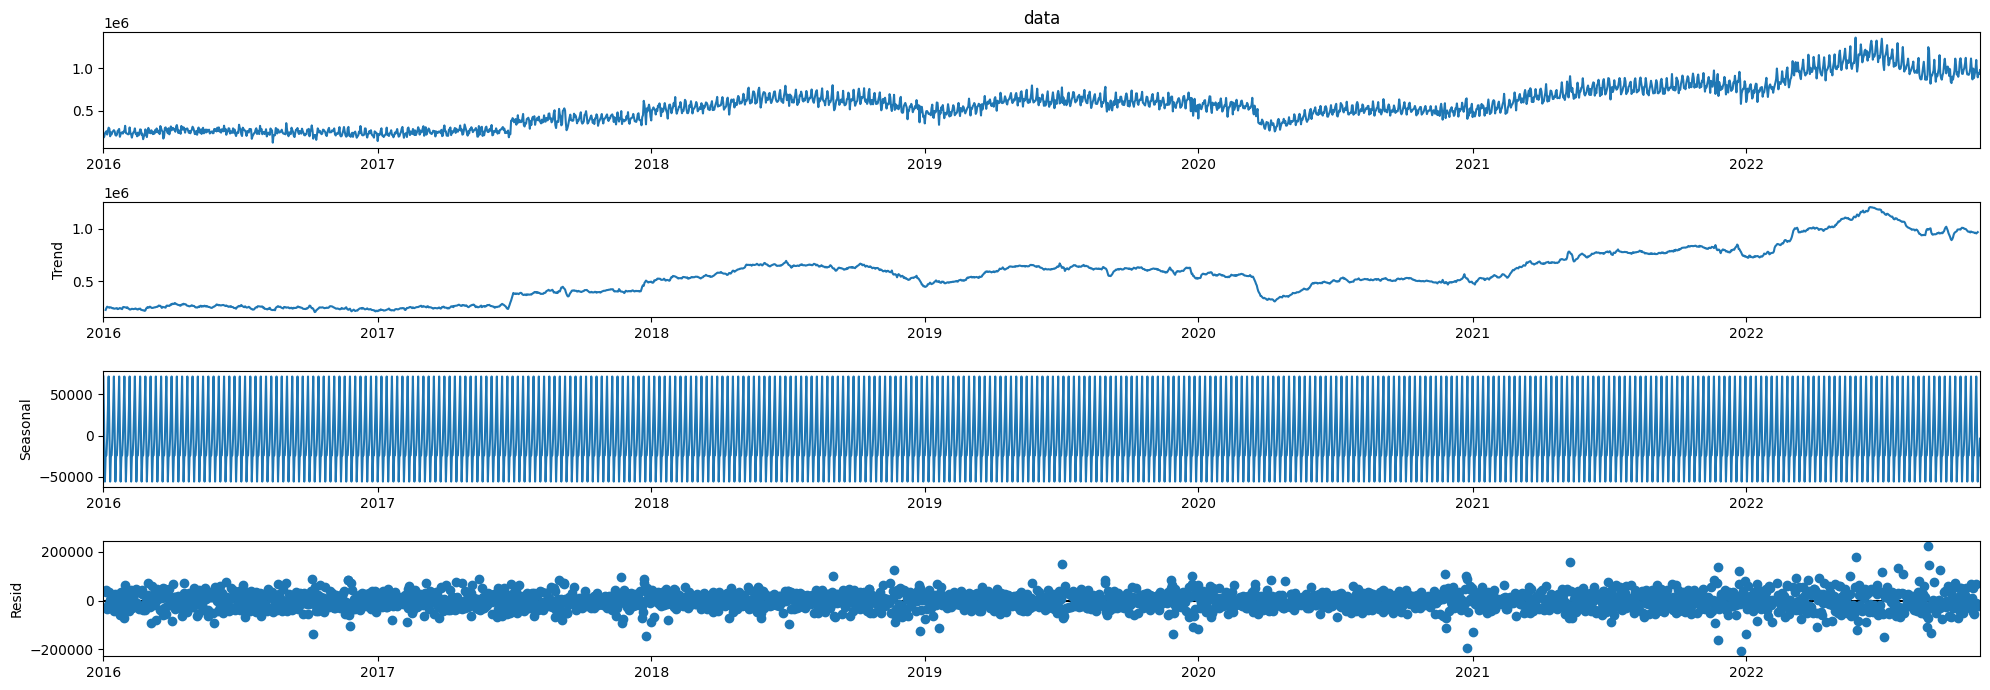

In [240]:
result31.plot()

In [188]:
company3_d1 = company3['data'].diff().dropna()

In [189]:
pp3 = PhillipsPerron(company3_d1)
print(pp3.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic               -152.876
P-value                         0.000
Lags                               27
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


d:\Python3.9\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='data'>

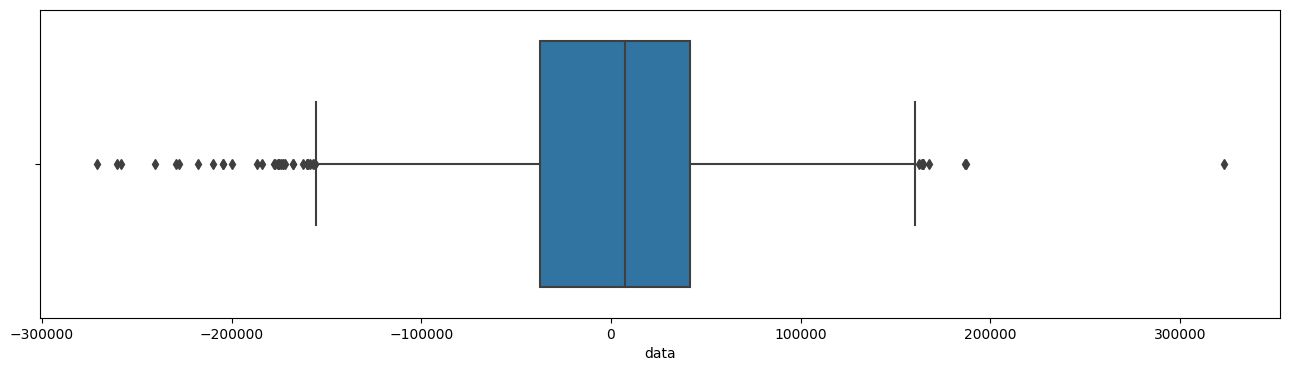

In [190]:
sns.boxplot(company3_d1)

The lower bound value is: -190111.83673319017
The upper bound value is: 190746.9846990847


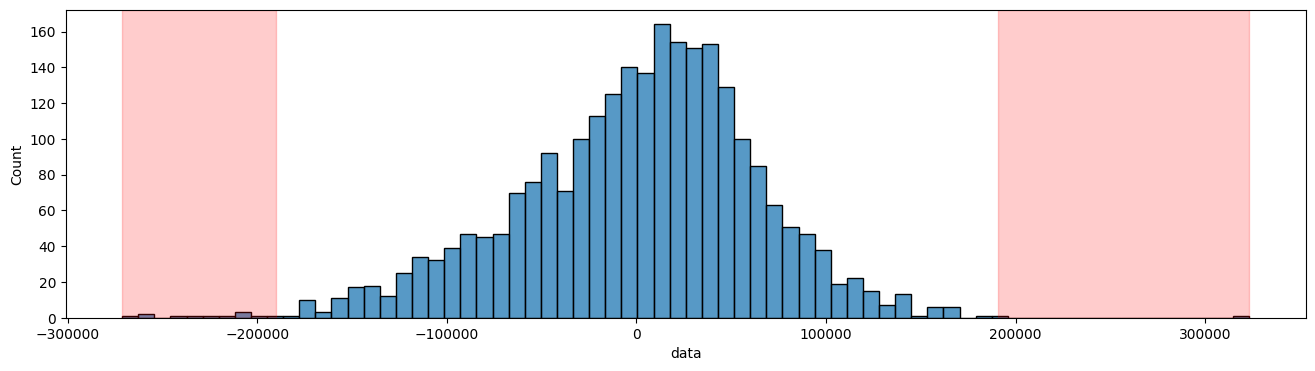

In [191]:
data_mean, data_std = company3_d1.mean(), company3_d1.std()
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

print('The lower bound value is:', data_mean - cut_off)
print('The upper bound value is:', data_mean + cut_off)

sns.histplot(company3_d1, bins=70)
plt.axvspan(xmin = lower,xmax= company3_d1.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= company3_d1.max(),alpha=0.2, color='red')

C:\Users\GuangruiXUE\AppData\Local\Temp\ipykernel_51956\2197589621.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  companyseries = pd.DataFrame(credit[(credit["Unnamed: 0"].\


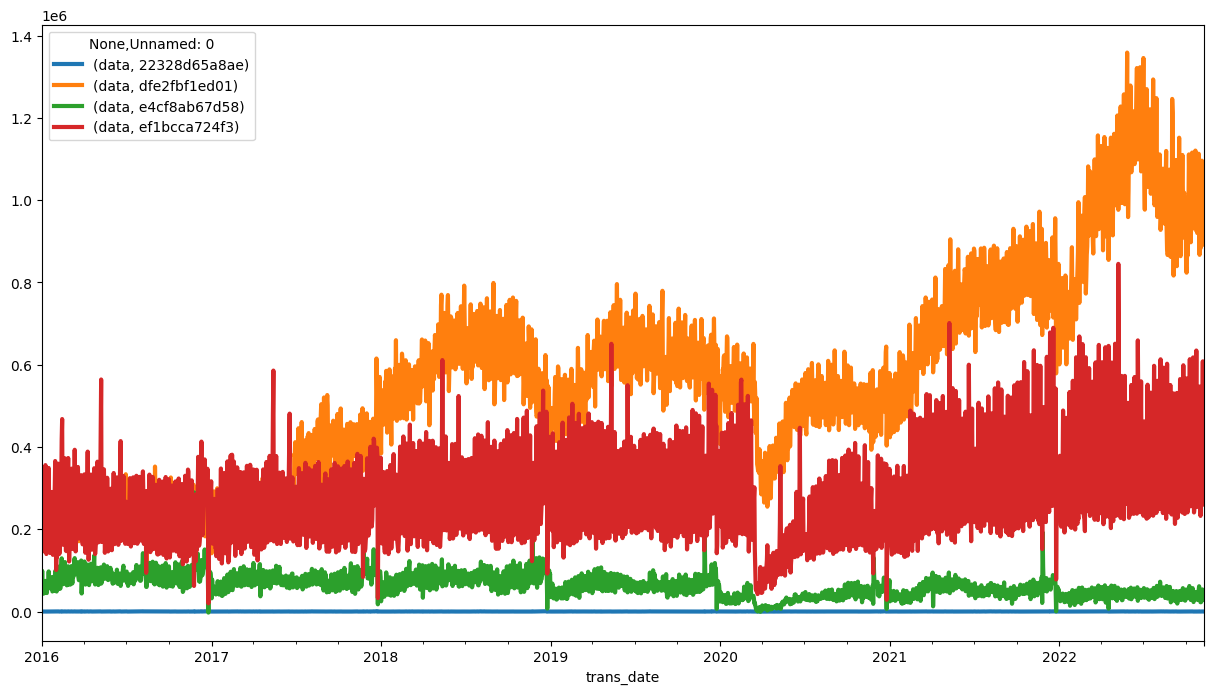

In [103]:
companyseries = pd.DataFrame(credit[(credit["Unnamed: 0"].\
    isin(company_list))][credit.columns].\
    dropna().\
    groupby(['trans_date', 'Unnamed: 0'])['Unnamed: 0','data'].mean().unstack())
companyseries.plot(figsize=(15,8), linewidth=3)
plt.show()

<AxesSubplot:xlabel='trans_date'>

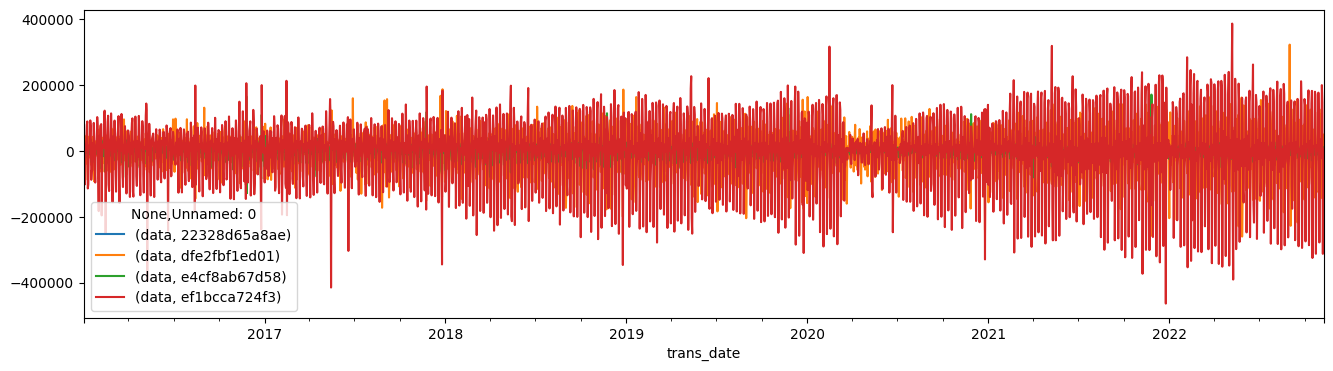

In [197]:
companyseries_d1 = companyseries.diff().dropna()
companyseries_d1.plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

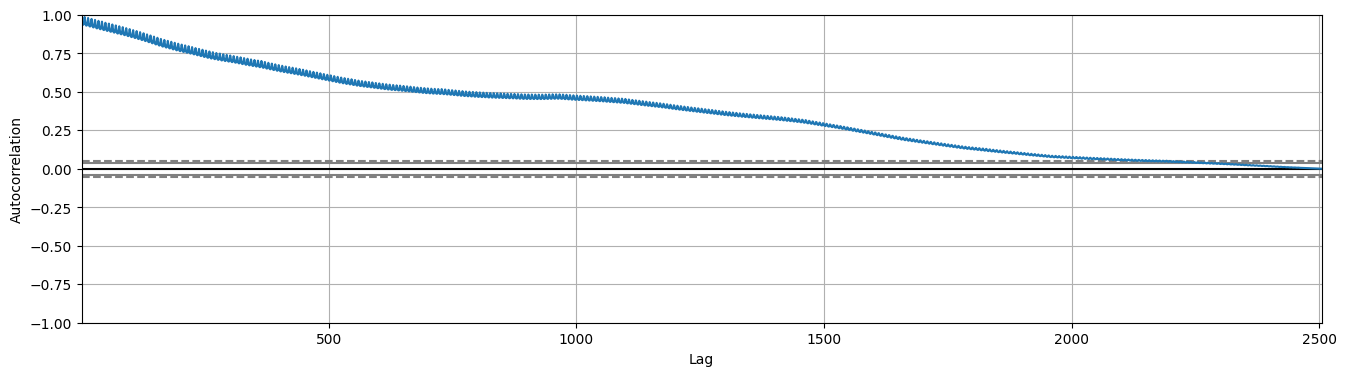

In [104]:
pd.plotting.autocorrelation_plot(companyseries)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

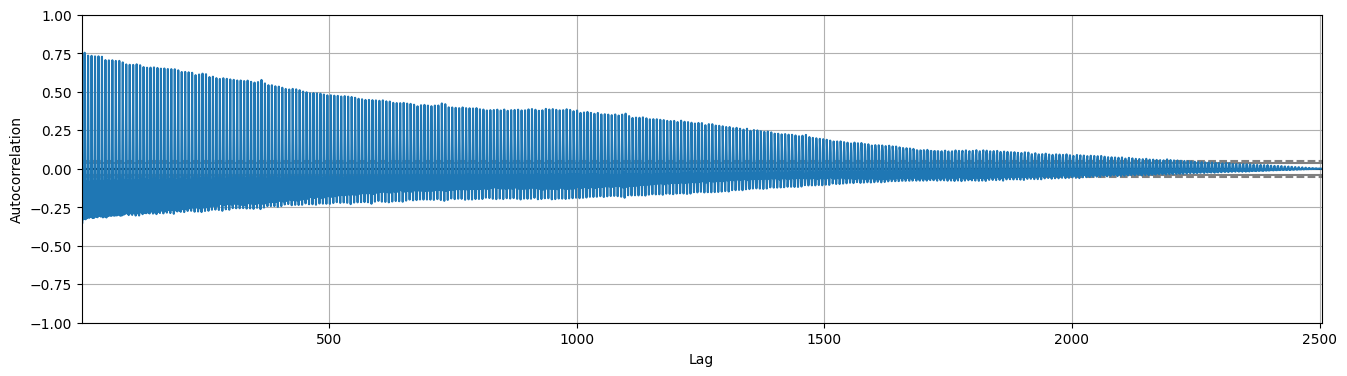

In [198]:
pd.plotting.autocorrelation_plot(companyseries_d1)

In [102]:
companyseries.corr()

data                                       
Unnamed: 0        22328d65a8ae dfe2fbf1ed01 e4cf8ab67d58 ef1bcca724f3
     Unnamed: 0                                                      
data 22328d65a8ae     1.000000     0.080177     0.543639     0.262213
     dfe2fbf1ed01     0.080177     1.000000    -0.333582     0.273024
     e4cf8ab67d58     0.543639    -0.333582     1.000000     0.172284
     ef1bcca724f3     0.262213     0.273024     0.172284     1.000000

In [269]:
companyseries_d1.corr()

data                                       
Unnamed: 0        22328d65a8ae dfe2fbf1ed01 e4cf8ab67d58 ef1bcca724f3
     Unnamed: 0                                                      
data 22328d65a8ae     1.000000     0.291262     0.715083     0.032755
     dfe2fbf1ed01     0.291262     1.000000     0.199409    -0.383600
     e4cf8ab67d58     0.715083     0.199409     1.000000     0.156110
     ef1bcca724f3     0.032755    -0.383600     0.156110     1.000000